## **Allocation of marks**

Stages 1,2,3   Total 30%

Ideally your dataset will not need a lot of work. Marks going for the choosing,  training, evaluation and refining of model primarily

---

Stage 4,5       Total 60%

Choose your model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Train and evaluate your model. Refine the model or choose another estimator or approach?

Do not overwrite cells and add commentry between iterations.

---

Stage 6         Total 10%

# Irish Planning Data Driven Project

# **Stage 1**
***Describe Data***

The Core data is obtained directly from Gov.ie, namely via the link:

https://data.gov.ie/dataset/planning-application-points1

This data describes the planning application for all planning proposal in ireland from 2012-2024, however it varies from county to county as it is an aggregation of the applications received from each local planning authority.

The data claims to be cleaned however several inconsistencies have been found evn within a limited set of this data.

The first values of the data that were looked at were the X and Y labels as these were suspected to translate to map co-ordinates, the plan of the project was to use these to gather the Google Maps Satellite Image for the X and Y values.

Thus creating a new data set with both the data from the original set and the new generated images.

The first issue with this is that the assumed XY values did not correlate to the assumption of ITM Easting and Northing, instead it was discovered that this related to Web Mercator, which was then translated into GPS Co-ordinates for the Google Maps API.

Manually confirming the resultant co-ordinates with th first address of the data set meant the project could continue.

Other key parts of the data are if the application was successful or not, mainly applications that are successful are labeled as Conditional as all applications are under the condition of completion of works within a certain number of years for example.

Applications can also be appealed should the decision be negative.

It also contains whether the application associates to a residential unit or not. This was used to reduce the data set further as the map image could become difficult to identify a housing estate rather than a singular build.

Since the data set will contain images and requires the use of an API, the cleaned data will be filtered down based on planning authority, namely Kerry County Council.

This reduces the number of images to gather to roughly 7000, the api was run and

Once the data with images was obtained the problem is that this image has no labels etc. associated with it. As such a helper function was created to view the images and label them, as either Built or site.


# **Stage 2**

The chosen data column to predict was this previously mentioned Built or Site label, namely the build_status column.

The reasoning behind why this information would be useful is simply it could be used to remotely inspect whether an application decision was violated, in the case of if an application was refused yet the building remains or was constructed.

It could also be used to potentially find where an application was approved and was never constructed, potentially spotting where further development could be beneficial.

There is two approaches to the prediction of whether an application resulted in a built housing unit or remains a site.

The first approach is to simply use the textual data gathered from the application and relate this to the newly created build_status.

The second would be to use the google maps API and run it through a CNN.

# **Stage 3**

As previously mentioned , the data obtained only appeared cleaned on the surface, in order to get this to a working dataset for this project several helper functions were created to achieve the desired data outcome.

Firstly, the `clean_planning_data` function is designed to process a CSV file containing the original data.

Its primary goal is to filter out any rows where the easting coordinate column contains alphabetic characters, which indicates rows that violate the other data columns.

After removing these problematic rows, the function also strips out the easting and northing coordinate columns, effectively cleaning and standardizing the dataset for further analysis or processing.

The cleaned data is then saved to a new CSV file, providing a more reliable and consistent dataset for subsequent use.

Next the `transform_coords_df` function is used to translate the X and Y into gps Lat Long co-ordinates. This function can actually be used to translate many different co-ordinate systems into other ones but in this case it translates the Web Mercator X and Y into gps lat long.

After this, the next step is to test the Google Maps API to see if Images can be obtained based on this new co-ordinate data.

The code was used to test the first 10 rows of the data set. After confirming the images linked with the correct description of the location on the data, the decision was made to continue to use the data set.

However, gathering API images for over 480k records and processing that data is too much for the scope of this project and the processing power and time would be substantial.

As such the next steps were to reduce the data set further cleaning un-necessary columns etc.

The code for further cleaning performs a series of progressive filtering operations on a planning dataset, focusing specifically on Kerry County Council's planning data.

It first extracts only the rows related to Kerry County Council, then systematically reduces the dataset by removing rows with missing or blank decisions.

Further filtering occurs by keeping only rows with exactly one residential unit and a non-zero, non-empty site area.

Finally, the code removes personal applicant information columns and saves the refined dataset to a new CSV file, significantly narrowing down the original dataset to a more focused and clean subset of planning applications.

This resulted in a manageable data set of roughly 7000 rows, which the Google Maps API code was then run on this entire subset of data to obtain the planning data, this process took 2 hours each run, two runs were completed with two different zooms levels, namely zoom 18 and zoom 19.

The zoom 19 was determined to be a better dataset for this project as the zoom 18 made it harder to identify which site or building was the one related to the application.

The next stage involved classifying the planning application sites visually.

Labeling the entire dataset was impractical due to the volume, so the data was first filtered to include only applications with a ReceivedDate prior to 2020, resulting in a working subset of 2,812 records.

To manually label these images as either 'built' (indicating construction completion) or 'site' (representing undeveloped land or early stages), the helper function interactive_labeling_widgets_keyboard was utilized.

This function presented the satellite image corresponding to each record's coordinates and captured the classification via keyboard input ('b' or 's').

This manual labeling process, however, highlighted significant challenges inherent within the aggregated dataset.

Image quality varied greatly, ranging from high-resolution clarity to instances obscured by blurriness, cloud cover, or inconsistent zoom levels despite uniform API settings.

Identifying the correct plot was further complicated by occasionally skewed image centering.

Moreover, the data filtering wasn't perfect, as numerous commercial properties appeared within the supposedly residential selection.

Consequently, labeling often necessitated subjective judgment calls, rendering the final 'built' or 'site' classifications a best-effort interpretation rather than definitive ground truth.

These labeling problems clearly show the dataset's inconsistency, likely stemming from the combination of records from different counties.

This type of variability was previously seen during date filtering, which required handling several different date and time formats.

Further columns after this were identified to be dropped, namely the Link Application Details, Application Number and Development Postcode columns, as these were mainly blank or irrelevant.

# **Stage 4 a - CNN Model on Images**
A Convolutional Neural Network (CNN) was selected as the first modeling approach due to its inherent strengths in image recognition tasks.

CNNs are specifically designed to automatically learn hierarchical spatial features directly from pixel data, making them well-suited for analyzing the satellite imagery associated with planning applications.

Unlike methods requiring manual feature engineering or those operating on flattened data (like PCA), CNNs can effectively capture textures, shapes, and spatial arrangements indicative of whether a site is built upon or remains undeveloped.

This ability to learn relevant visual patterns directly from the 640x640 grayscale images was deemed crucial for building an effective classifier for the 'built' versus 'site' categories.

# **Stage 5 a - CNN Model on Images**

The Convolutional Neural Network (CNN) achieved a high overall test accuracy of 87.03%, indicating a good general capability to distinguish between the 'built' and 'site' image categories in the unseen test data.

The model demonstrates particularly strong performance in identifying 'built' structures, achieving a precision of 0.87 and a very high recall of 0.98.

This means that when the model predicts an image shows a 'built' property, it is correct 87% of the time, and it successfully identifies 98% of all actual 'built' properties present in the test set.

The confusion matrix confirms this, showing only 7 'built' cases were misclassified as 'site'.

However, the model's performance on the 'site' category is significantly weaker, particularly regarding recall (0.33).

While its precision for 'site' predictions is reasonable (0.82 – meaning 82% of images predicted as 'site' truly were sites), it only managed to correctly identify 33% of the actual 'site' images in the test set.

The confusion matrix highlights this imbalance, revealing that a substantial number of true 'site' images (66) were incorrectly classified as 'built'.

This suggests the model is biased towards predicting 'built' and struggles to reliably recognize undeveloped sites, potentially due to class imbalance in the training data or insufficient distinguishing features learned for the 'site' category.

# **Stage 4 b - PAC Model on Images**
Choose and train Estimator.

# **Stage 5 b - PAC Model on Images**
Evaluate your model and revisit 4...repeat..

# **Stage 6**
***Present results and Conclusions***


In [1]:
import pandas as pd
from pyproj import Transformer, CRS
import numpy as np
from typing import Optional, Union
import requests
import matplotlib.pyplot as plt
from PIL import Image
import yaml
import io
import time
from tqdm.notebook import tqdm
from typing import Optional, Tuple, Dict, Any, List
import re

In [1]:
# --- Configuration ---
# Specify the path to your input data file (e.g., CSV)
# Make sure the file path is correct for your system.
# Use raw strings (r'...') or double backslashes ('\\') on Windows if needed.
input_file_path = 'your_planning_data.csv'

# Specify the path for the output file with added GPS coordinates
output_file_path = 'planning_data_with_gps.csv'

# Define the column names for the source coordinates
x_col = 'x'
y_col = 'y'

# Define the names for the new GPS coordinate columns
lat_col = 'latitude'
lon_col = 'longitude'

# Define the EPSG codes
# Source CRS: ITM (Irish Transverse Mercator)
source_crs_epsg = 2157
# Target CRS: WGS84 (standard GPS coordinates)
target_crs_epsg = 4326

In [3]:
def transform_coords_df(
    data: Union[pd.DataFrame, str],
    x_col: str = 'x',
    y_col: str = 'y',
    lat_col: str = 'latitude',
    lon_col: str = 'longitude',
    source_crs_epsg: int = 2157, # Default: ITM (Ireland)
    target_crs_epsg: int = 4326, # Default: WGS84 (GPS)
    input_file_type: str = 'csv', # 'csv' or 'excel' if data is a path
    output_path: Optional[str] = None, # Optional: Path to save the result
    **kwargs # Allow passing extra arguments to pd.read_csv/read_excel
    ) -> Optional[pd.DataFrame]:
    """
    Transforms coordinates from a source CRS to a target CRS within a pandas DataFrame.

    Handles loading data from a file path or using an existing DataFrame.

    Args:
        data (Union[pd.DataFrame, str]): Either a pandas DataFrame object
                                         or a string path to the input data file (CSV or Excel).
        x_col (str): Name of the column containing the source x/easting coordinates.
                     Defaults to 'x'.
        y_col (str): Name of the column containing the source y/northing coordinates.
                     Defaults to 'y'.
        lat_col (str): Name for the new column containing the target latitude.
                       Defaults to 'latitude'.
        lon_col (str): Name for the new column containing the target longitude.
                       Defaults to 'longitude'.
        source_crs_epsg (int): EPSG code of the source coordinate reference system.
                               Defaults to 2157 (ITM).
        target_crs_epsg (int): EPSG code of the target coordinate reference system.
                               Defaults to 4326 (WGS84).
        input_file_type (str): Specifies the file type if 'data' is a path.
                               Options: 'csv', 'excel'. Defaults to 'csv'.
        output_path (Optional[str]): If provided, the path to save the resulting
                                     DataFrame as a CSV file. Defaults to None (no saving).
        **kwargs: Additional keyword arguments to pass to pandas read function
                  (e.g., `sep='\t'` for pd.read_csv).

    Returns:
        Optional[pd.DataFrame]: The DataFrame with added latitude and longitude columns,
                                or None if a critical error occurred (e.g., file not found,
                                essential columns missing).
    """
    try:
        # --- Load Data ---
        if isinstance(data, str):
            input_path = data
            print(f"Loading data from: {input_path}")
            if input_file_type.lower() == 'csv':
                df = pd.read_csv(input_path, **kwargs)
            elif input_file_type.lower() == 'excel':
                df = pd.read_excel(input_path, **kwargs)
            else:
                raise ValueError(f"Unsupported input_file_type: '{input_file_type}'. Use 'csv' or 'excel'.")
            print(f"Successfully loaded {len(df)} records.")
        elif isinstance(data, pd.DataFrame):
            df = data.copy() # Work on a copy to avoid modifying the original DataFrame outside the function
            print(f"Using provided DataFrame with {len(df)} records.")
        else:
            raise TypeError("Input 'data' must be a pandas DataFrame or a file path string.")

        print("Columns found:", df.columns.tolist())

        # --- Data Cleaning and Preparation ---
        if x_col not in df.columns or y_col not in df.columns:
            print(f"Error: Required source coordinate columns '{x_col}' and/or '{y_col}' not found.")
            return None # Indicate critical error

        df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
        df[y_col] = pd.to_numeric(df[y_col], errors='coerce')

        valid_coords_mask = df[x_col].notna() & df[y_col].notna()
        num_valid = valid_coords_mask.sum()
        num_invalid = len(df) - num_valid

        if num_valid == 0:
            print(f"\nWarning: No valid numeric coordinates found in columns '{x_col}' and '{y_col}'.")
            print("Adding empty coordinate columns, but no transformation performed.")
            df[lon_col] = np.nan
            df[lat_col] = np.nan
            # Still return the df with empty columns added
        else:
            print(f"\nFound {num_valid} records with valid coordinates to transform.")
            if num_invalid > 0:
                print(f"Found {num_invalid} records with missing/invalid source coordinates.")

            # --- Coordinate Transformation ---
            print(f"\nSetting up transformation from EPSG:{source_crs_epsg} to EPSG:{target_crs_epsg}...")
            crs_source = CRS.from_epsg(source_crs_epsg)
            crs_target = CRS.from_epsg(target_crs_epsg)
            transformer = Transformer.from_crs(crs_source, crs_target, always_xy=True)

            print("Performing coordinate transformation...")
            df[lon_col] = np.nan
            df[lat_col] = np.nan

            x_coords = df.loc[valid_coords_mask, x_col].values
            y_coords = df.loc[valid_coords_mask, y_col].values

            # Perform transformation (transformer expects x, y -> returns lon, lat due to always_xy=True)
            lon_transformed, lat_transformed = transformer.transform(x_coords, y_coords)

            df.loc[valid_coords_mask, lon_col] = lon_transformed
            df.loc[valid_coords_mask, lat_col] = lat_transformed
            print("Transformation complete.")

        # --- Save Output (Optional) ---
        if output_path:
            try:
                print(f"\nSaving updated data to: {output_path}")
                df.to_csv(output_path, index=False, encoding='utf-8-sig')
                print("Save successful.")
            except Exception as e:
                print(f"Error saving file to {output_path}: {e}")
                # Continue to return the DataFrame even if saving failed

        return df

    except FileNotFoundError:
        print(f"Error: Input file not found at '{data}'. Please check the path.")
        return None
    except (ValueError, TypeError) as ve:
        print(f"Data processing error: {ve}")
        return None
    except ImportError:
        print("Error: Required libraries not found.")
        print("Please ensure pandas and pyproj are installed: pip install pandas pyproj")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        import traceback
        traceback.print_exc() # Print detailed traceback for unexpected errors
        return None


In [15]:
def clean_planning_data(
    input_path: str,
    output_path: str = 'application_file_cleaned.csv',
    easting_col: str = 'ITMEasting',
    northing_col: str = 'ITMNorthing'
    ) -> Optional[pd.DataFrame]:
    """
    Correctly cleans a planning application CSV file by:
    1. Removing rows ONLY if the 'easting_col' contains actual letters (a-zA-Z).
       Rows with NaN, None, empty strings (''), whitespace-only strings (' '),
       or numbers/punctuation in 'easting_col' will NOT be removed by this check.
    2. Removing the 'easting_col' and 'northing_col' columns.
    3. Saving the cleaned data to 'output_path'.

    Args:
        input_path (str): Path to the input CSV file.
        output_path (str): Path to save the cleaned CSV file.
                           Defaults to 'application_file_cleaned.csv'.
        easting_col (str): Name of the ITM Easting column to check for letters
                           and subsequently remove. Defaults to 'ITMEasting'.
        northing_col (str): Name of the ITM Northing column to remove.
                            Defaults to 'ITMNorthing'.

    Returns:
        Optional[pd.DataFrame]: The cleaned DataFrame, or None if an error occurred.
    """
    print(f"--- Starting Corrected Cleaning Process ---")
    print(f"Input file: {input_path}")
    print(f"Output file: {output_path}")
    print(f"Checking column: '{easting_col}' for actual letters (A-Z, a-z).")
    print(f"Columns to remove: ['{easting_col}', '{northing_col}']")

    try:
        # 1. Read the CSV file
        # Use low_memory=False to help with potentially mixed data types in columns
        try:
            df = pd.read_csv(input_path, low_memory=False)
        except Exception as read_err:
            print(f"Warning: Initial read attempt failed ({read_err}). Trying basic read.")
            df = pd.read_csv(input_path) # Fallback

        initial_rows = len(df)
        if initial_rows == 0:
             print(f"Input file '{input_path}' is empty. No cleaning needed.")
             # Optionally save an empty file or just return None/empty DataFrame
             df.to_csv(output_path, index=False, encoding='utf-8-sig')
             return df

        print(f"\nRead {initial_rows} rows from {input_path}.")

        # 2. Identify rows where 'easting_col' contains letters, handling NaNs correctly
        if easting_col not in df.columns:
            print(f"Error: Column '{easting_col}' not found in the input file. Cannot perform cleaning check.")
            return None

        # Create the mask safely:
        # - Use .str accessor which handles NaN implicitly (returns NaN for contains check)
        # - Apply .contains(r'[a-zA-Z]') -> returns True, False, or NaN
        # - Fill resulting NaN values with False (meaning NaNs don't contain letters)
        # - Ensure the result is boolean type
        has_letters_mask = df[easting_col].str.contains(r'[a-zA-Z]', regex=True, na=False)
        # Double-check `na=False`: This should treat NaN as False for contains. Let's trust it.
        # If still problematic, the alternative is:
        # has_letters_mask = df[easting_col].str.contains(r'[a-zA-Z]', regex=True).fillna(False).astype(bool)


        rows_with_letters = has_letters_mask.sum()
        print(f"\nAnalysis of '{easting_col}':")
        print(f"- Found {rows_with_letters} rows containing letters.")

        # --- Debugging Info ---
        if 0 < rows_with_letters < 20: # Print samples if manageable
             print(f"- Examples of values in '{easting_col}' flagged as containing letters:")
             # Show unique non-null values from the original series that triggered the mask
             flagged_values = df.loc[has_letters_mask, easting_col].dropna().unique()
             print(flagged_values[:10])
        elif rows_with_letters == initial_rows and initial_rows > 0:
             print(f"- WARNING: The check flagged all {rows_with_letters} rows. This is suspicious.")
             print(f"- Sample original values from '{easting_col}':")
             print(df[easting_col].dropna().unique()[:20]) # Show unique non-null values
        # --- End Debugging Info ---


        # 3. Filter out rows containing letters
        if rows_with_letters > 0:
            print(f"\nFiltering: Removing {rows_with_letters} rows where '{easting_col}' contains letters.")
            # Keep rows where the mask is False (i.e., NO letters found)
            df_cleaned = df[~has_letters_mask].copy() # Use .copy()
            print(f"Rows remaining after filtering: {len(df_cleaned)}")

            # Verification check
            if len(df_cleaned) == 0 and initial_rows > 0:
                 print(f"CRITICAL WARNING: Filtering removed all rows unexpectedly. Please manually inspect '{easting_col}'.")
                 print(f"Sample unique original non-NaN values in '{easting_col}':")
                 print(df[easting_col].dropna().unique()[:50])
                 return None # Stop execution
        else:
            print(f"\nFiltering: No rows found with letters in '{easting_col}'. No rows removed based on this criterion.")
            df_cleaned = df.copy() # Keep original if no filtering needed

        # 4. Remove the specified ITM columns
        columns_to_drop = []
        if easting_col in df_cleaned.columns:
            columns_to_drop.append(easting_col)
        if northing_col in df_cleaned.columns:
             columns_to_drop.append(northing_col)

        if columns_to_drop:
            # Check if columns actually exist before trying to drop
            existing_columns_to_drop = [col for col in columns_to_drop if col in df_cleaned.columns]
            if existing_columns_to_drop:
                df_cleaned = df_cleaned.drop(columns=existing_columns_to_drop)
                print(f"\nRemoved columns: {existing_columns_to_drop}.")
            else:
                print(f"\nNote: Columns specified for removal ({columns_to_drop}) not found in the DataFrame.")
        else:
            print("\nNo columns specified for removal.")


        # 5. Save the cleaned DataFrame
        df_cleaned.to_csv(output_path, index=False, encoding='utf-8-sig')
        print(f"\nSuccessfully saved cleaned data ({len(df_cleaned)} rows) to {output_path}")
        print(f"--- Corrected Cleaning Process Finished ---")

        return df_cleaned

    except FileNotFoundError:
        print(f"Error: Input file not found at '{input_path}'. Please check the path.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: Input file '{input_path}' is empty.")
        # Save an empty file consistent with behavior for 0 rows read initially
        pd.DataFrame().to_csv(output_path, index=False, encoding='utf-8-sig')
        return pd.DataFrame() # Return empty DataFrame
    except Exception as e:
        print(f"An unexpected error occurred during cleaning: {e}")
        import traceback
        traceback.print_exc()
        return None

In [16]:
# Specify the path to your original data file
original_file = 'data/PlanningApplications/IrishPlanningApplications_points.csv'

# Specify the desired name for the cleaned output file
cleaned_file = 'application_file_cleaned.csv'

# Run the cleaning function
cleaned_dataframe = clean_planning_data(original_file, cleaned_file)

--- Starting Corrected Cleaning Process ---
Input file: data/PlanningApplications/IrishPlanningApplications_points.csv
Output file: application_file_cleaned.csv
Checking column: 'ITMEasting' for actual letters (A-Z, a-z).
Columns to remove: ['ITMEasting', 'ITMNorthing']

Read 483575 rows from data/PlanningApplications/IrishPlanningApplications_points.csv.

Analysis of 'ITMEasting':
- Found 5 rows containing letters.
- Examples of values in 'ITMEasting' flagged as containing letters:
['Permission                                        ' 'Permission'
 'Section 5']

Filtering: Removing 5 rows where 'ITMEasting' contains letters.
Rows remaining after filtering: 483570

Removed columns: ['ITMEasting', 'ITMNorthing'].

Successfully saved cleaned data (483570 rows) to application_file_cleaned.csv
--- Corrected Cleaning Process Finished ---


In [17]:
if cleaned_dataframe is not None:
    print("\n--- Head of cleaned data ---")
    print(cleaned_dataframe.head())
    print("\n--- Info of cleaned data ---")
    cleaned_dataframe.info()


--- Head of cleaned data ---
   OBJECTID     Planning Authority Application Number  \
0       1.0  Carlow County Council                161   
1       2.0  Carlow County Council               1610   
2       3.0  Carlow County Council              16100   
3       4.0  Carlow County Council              16101   
4       5.0  Carlow County Council              16102   

                             Development Description  \
0  to construct a two storey split level dwelling...   
1  to construct a 256sqm single storey dwelling w...   
2  the erection of a single storey agricultural s...   
3  the change of use of part of existing office p...   
4     to construct an extension to its premises \r\n   

                                 Development Address Development Postcode  \
0            Linkardstown  , Tinryland  , Co. Carlow                  NaN   
1                             Myshall  , Co. Carlow                   NaN   
2                 Ballyvangour  , Deerpark  , Tullow       

In [18]:
input_csv_path = r'application_file_cleaned.csv'

In [20]:
transformed_df = transform_coords_df(
    data=input_csv_path,       # Or pass your existing DataFrame: data=my_dataframe
    x_col='x',
    y_col='y',
    source_crs_epsg=3857,      # Web Mercator
    target_crs_epsg=4326,      # Keep target as WGS84 for GPS
    output_path='planning_data_with_gps_corrected.csv' # Optional save path
)

Loading data from: application_file_cleaned.csv


C:\Users\Adam\AppData\Local\Temp\ipykernel_7540\500265273.py:51: DtypeWarning: Columns (2,5,12,15,18,22,24,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path, **kwargs)


Successfully loaded 483570 records.
Columns found: ['OBJECTID', 'Planning Authority', 'Application Number', 'Development Description', 'Development Address', 'Development Postcode', 'Application Status', 'Application Type', 'Applicant Forename', 'Applicant Surname', 'Applicant Address', 'Decision', 'Land Use Code', 'AreaofSite', 'NumResidentialUnits', 'One-Off House', 'FloorArea', 'ReceivedDate', 'WithdrawnDate', 'DecisionDate', 'DecisionDueDate', 'GrantDate', 'ExpiryDate', 'Appeal Reference Number', 'Appeal Status', 'Appeal Decision', 'AppealDecisionDate', 'AppealSubmittedDate', 'FIRequestDate', 'FIRecDate', 'Link Application Details', 'One-Off KPI', 'ETL_DATE', 'Site Id', 'ORIG_FID', 'x', 'y']

Found 483565 records with valid coordinates to transform.
Found 5 records with missing/invalid source coordinates.

Setting up transformation from EPSG:3857 to EPSG:4326...
Performing coordinate transformation...
Transformation complete.

Saving updated data to: planning_data_with_gps_correcte

In [21]:
if transformed_df is not None:
    print("\nTransformation finished. Displaying head of the resulting DataFrame:")
    # Display relevant columns
    display_cols = ['OBJECTID', 'x', 'y', 'latitude', 'longitude']
    existing_display_cols = [col for col in display_cols if col in transformed_df.columns]
    print(transformed_df[existing_display_cols].head())

    # Let's check the first point specifically
    first_point = transformed_df.iloc[0]
    print("\nCoordinates for first point (OBJECTID={}):".format(first_point.get('OBJECTID', 'N/A')))
    print(f"  Original X: {first_point.get('x', 'N/A')}")
    print(f"  Original Y: {first_point.get('y', 'N/A')}")
    print(f"  Calculated Latitude: {first_point.get('latitude', 'N/A'):.6f}")
    print(f"  Calculated Longitude: {first_point.get('longitude', 'N/A'):.6f}")

    # You can copy-paste the lat/lon into Google Maps to verify
    # Expected result for OBJECTID 1 should be near Tinryland, Co. Carlow, Ireland
    # Approximately: 52.77195, -6.89140

else:
    print("\nFunction execution failed. Please check the error messages above.")


Transformation finished. Displaying head of the resulting DataFrame:
   OBJECTID              x             y   latitude  longitude
0       1.0 -767173.863360  6.943690e+06  52.786972  -6.891640
1       2.0 -754986.223363  6.923631e+06  52.677855  -6.782157
2       3.0 -745509.307849  6.945430e+06  52.796423  -6.697024
3       4.0 -774218.564910  6.928091e+06  52.702141  -6.954924
4       5.0 -767884.199778  6.953382e+06  52.839592  -6.898021

Coordinates for first point (OBJECTID=1.0):
  Original X: -767173.863360434
  Original Y: 6943690.30078147
  Calculated Latitude: 52.786972
  Calculated Longitude: -6.891640


# Google Maps API Code

In [15]:
# --- Configuration for map extractor ---
DEFAULT_SECRETS_PATH = 'secrets.yml'
DEFAULT_REQUESTED_API_SIZE = (640, 640)
DEFAULT_ZOOM_LEVEL = 19       # Higher zoom level (18-20 is usually good for buildings/sites)
DEFAULT_MAP_TYPE = 'satellite'  # Options: 'roadmap', 'satellite', 'hybrid', 'terrain'
DEFAULT_PIXEL_COL_NAME = 'map_pixel_array'

In [17]:
def load_api_key(secrets_path: str, key_name: str = 'google_maps') -> Optional[str]:
    """Loads an API key from a specified YAML file."""
    try:
        with open(secrets_path, 'r') as f:
            secrets = yaml.safe_load(f)
        key = secrets.get('api_keys', {}).get(key_name)
        if not key:
            print(f"Error: Key '{key_name}' not found within 'api_keys' in {secrets_path}")
            return None
        if key == 'YOUR_ACTUAL_GOOGLE_MAPS_API_KEY':
             print(f"Warning: Using placeholder API key from {secrets_path}. Replace it with your actual key.")
        return key
    except FileNotFoundError:
        print(f"Error: Secrets file not found at '{secrets_path}'")
        return None
    except yaml.YAMLError as e:
        print(f"Error reading YAML file '{secrets_path}': {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred loading secrets: {e}")
        return None

# --- fetch_and_process_map_image_direct function remains the same ---
def fetch_and_process_map_image_direct(
    lat: float,
    lon: float,
    api_key: str,
    requested_size: Tuple[int, int] = DEFAULT_REQUESTED_API_SIZE,
    zoom: int = DEFAULT_ZOOM_LEVEL,
    maptype: str = DEFAULT_MAP_TYPE
    ) -> Optional[np.ndarray]:
    """
    Fetches a static map image at the requested size, converts to grayscale,
    and returns as a numpy array WITHOUT resizing after fetch.
    """
    base_url = "https://maps.googleapis.com/maps/api/staticmap"
    req_w, req_h = requested_size
    if req_w > 640 or req_h > 640:
        print(f"Warning: Requested size ({req_w}x{req_h}) may exceed standard API limits (e.g., 640x640).")

    params: Dict[str, Any] = {
        "center": f"{lat},{lon}", "zoom": zoom, "size": f"{req_w}x{req_h}",
        "maptype": maptype, "format": "png", "key": api_key
    }
    try:
        response = requests.get(base_url, params=params, timeout=20)
        response.raise_for_status()
        image_bytes = io.BytesIO(response.content)
        with Image.open(image_bytes) as img:
            img_gray = img.convert('L')
            pixel_array = np.array(img_gray)
            if pixel_array.shape != (req_h, req_w):
                 print(f"Warning: Pixel array shape {pixel_array.shape} mismatch for ({lat},{lon}). Expected {(req_h, req_w)}.")
            return pixel_array
    except requests.exceptions.RequestException as e: print(f"Error fetching map for ({lat},{lon}): {e}"); return None
    except Image.UnidentifiedImageError: print(f"Error: Could not identify image format for ({lat},{lon}). Response status: {response.status_code}"); return None
    except Exception as e: print(f"Error processing image for ({lat},{lon}): {e}"); return None


# --- Function modified to use fixed default column name ---
def add_map_pixel_arrays_direct(
    data: Union[pd.DataFrame, str],
    lat_col: str = 'latitude',
    lon_col: str = 'longitude',
    secrets_path: str = DEFAULT_SECRETS_PATH,
    api_key_name: str = 'google_maps',
    requested_api_size: Tuple[int, int] = DEFAULT_REQUESTED_API_SIZE,
    zoom: int = DEFAULT_ZOOM_LEVEL,
    maptype: str = DEFAULT_MAP_TYPE,
    pixel_col_name: Optional[str] = None,
    output_path: Optional[str] = None,
    input_file_type: str = 'csv',
    delay_between_requests: float = 0.1
    ) -> Optional[pd.DataFrame]:
    """
    Adds a column with map image pixel arrays (NumPy) to a DataFrame.

    Fetches static maps, converts to grayscale arrays, and stores them using
    the default column name 'map_pixel_array' unless overridden by the
    'pixel_col_name' parameter. Uses .at for reliable cell assignment.
    """
    print("--- Starting Map Image Pixel Extraction (Direct Size) ---")

    final_pixel_col_name = pixel_col_name if pixel_col_name is not None else DEFAULT_PIXEL_COL_NAME
    print(f"Will store pixel arrays in column: '{final_pixel_col_name}'")

    # 1. Load API Key
    api_key = load_api_key(secrets_path, api_key_name)
    if not api_key: return None
    print("API Key loaded successfully.")

    # 2. Load DataFrame
    # ... (loading logic remains the same) ...
    if isinstance(data, str):
        input_path = data
        print(f"Loading data from: {input_path}")
        try:
            if input_file_type.lower() == 'csv': df = pd.read_csv(input_path, low_memory=False)
            elif input_file_type.lower() == 'excel': df = pd.read_excel(input_path)
            else: raise ValueError(f"Unsupported input_file_type: '{input_file_type}'.")
            print(f"Loaded {len(df)} records.")
        except FileNotFoundError: print(f"Error: Input file not found at '{input_path}'."); return None
        except Exception as e: print(f"Error reading input file: {e}"); return None
    elif isinstance(data, pd.DataFrame): df = data.copy(); print(f"Using provided DataFrame with {len(df)} records.")
    else: raise TypeError("Input 'data' must be a pandas DataFrame or a file path string.")


    # 3. Check columns
    if lat_col not in df.columns or lon_col not in df.columns:
        print(f"Error: Latitude ('{lat_col}') or Longitude ('{lon_col}') column not found."); return None

    # 4. Initialize new column
    if final_pixel_col_name not in df.columns: df[final_pixel_col_name] = pd.Series(dtype='object')
    else: print(f"Warning: Column '{final_pixel_col_name}' already exists. Overwriting."); df[final_pixel_col_name] = pd.Series(dtype='object')

    # 5. Iterate, Fetch, Process, Store
    w, h = requested_api_size
    print(f"Fetching maps ({w}x{h} pixels, zoom {zoom}, type '{maptype}')...")
    processed_count = 0
    skipped_count = 0
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing Rows"):
        lat = row[lat_col]; lon = row[lon_col]
        if pd.isna(lat) or pd.isna(lon) or not isinstance(lat, (int, float)) or not isinstance(lon, (int, float)):
            skipped_count += 1; continue

        pixel_array = fetch_and_process_map_image_direct(lat, lon, api_key, requested_size=requested_api_size, zoom=zoom, maptype=maptype)

        # --- Use .at for assigning the array to the single cell ---
        try:
            df.at[index, final_pixel_col_name] = pixel_array
        except Exception as set_err:
            print(f"Error setting value at index {index} for column {final_pixel_col_name}: {set_err}")
            # Optionally decide how to handle this row - maybe set None?
            # df.at[index, final_pixel_col_name] = None # Example fallback

        # --- End change ---

        if pixel_array is not None: processed_count += 1
        if delay_between_requests > 0: time.sleep(delay_between_requests)

    # ... (Rest of the function: summary, saving output remains the same) ...
    print(f"\n--- Processing Summary ---"); print(f"Successfully processed map arrays for {processed_count} rows.")
    print(f"Skipped {skipped_count} rows due to missing/invalid coordinates.")
    failed_count = len(df) - processed_count - skipped_count
    if failed_count > 0: print(f"Failed to fetch/process maps for {failed_count} rows (check logs).")

    if output_path:
        try:
            print(f"\nSaving updated DataFrame to: {output_path}")
            if not output_path.lower().endswith('.pkl'): output_path += '.pkl'; print(f"Saving in Pickle format to: {output_path}")
            df.to_pickle(output_path)
            print(f"Successfully saved to {output_path}.")
        except Exception as e: print(f"Error saving results to {output_path}: {e}")

    print("--- Map Image Pixel Extraction (Direct Size) Finished ---")
    return df

## Test on first 10 Rows to see if the google API works.

In [34]:
# Example test

# 1. Path to your FULL data file
full_input_data_file = 'planning_data_with_gps_corrected.csv'

# 2. Path to your secrets file
secrets_file = 'secrets.yml'

# 3. --- TESTING SETUP ---
NUM_ROWS_TO_TEST = 10 # Use a small number for testing
print(f"--- TESTING: Loading first {NUM_ROWS_TO_TEST} rows from {full_input_data_file} ---")
try:
    df_test_head = pd.read_csv(full_input_data_file, nrows=NUM_ROWS_TO_TEST, low_memory=False)
    print(f"Loaded {len(df_test_head)} rows for testing.")
except FileNotFoundError: print(f"Error: Cannot find input file {full_input_data_file}"); exit()
except Exception as e: print(f"Error reading head of file: {e}"); exit()
# --- End TESTING SETUP ---

# 4. Define desired API request size and zoom
api_image_size = (640, 640)
zoom_level = 18
map_type_requested = 'satellite'

# 5. Define the output file path for the TEST result
#    Filename can still be descriptive even if column name is fixed
output_pickle_file_test = f'TEST_pixels_{api_image_size[0]}x{api_image_size[1]}_z{zoom_level}_{map_type_requested}.pkl'

# 6. Run the function - Pass the DATAFRAME SUBSET
print(f"\n--- Running Pixel Extraction on {len(df_test_head)} test rows ---")
df_with_pixels_test = add_map_pixel_arrays_direct(
    data=df_test_head,
    lat_col='latitude',
    lon_col='longitude',
    secrets_path=secrets_file,
    requested_api_size=api_image_size,
    zoom=zoom_level,
    maptype=map_type_requested,
    output_path=output_pickle_file_test,
    delay_between_requests=0.1
    # No pixel_col_name argument passed, so it will use the default 'map_pixel_array'
    # If you wanted to override: pixel_col_name='custom_name_here'
)

# 7. Check the test result (if successful) - Look for the fixed name
if df_with_pixels_test is not None:
    print("\n--- Test Result Check ---")
    print(f"Test DataFrame shape: {df_with_pixels_test.shape}")

    # --- Explicitly check for the default column name ---
    expected_col_name = DEFAULT_PIXEL_COL_NAME # This is 'map_pixel_array'

    if expected_col_name in df_with_pixels_test.columns:
        print(f"Checking column: '{expected_col_name}'")
        valid_rows = df_with_pixels_test[df_with_pixels_test[expected_col_name].notna()]
        if not valid_rows.empty:
            first_valid_row = valid_rows.iloc[0]
            print(f"\nExample pixel array from first valid test row (Index: {first_valid_row.name}):")
            example_array = first_valid_row[expected_col_name]
            print(f" Type: {type(example_array)}")
            if isinstance(example_array, np.ndarray):
                 print(f" Shape: {example_array.shape}")
                 print(f" Dtype: {example_array.dtype}")
                 print(" Array sample:\n", example_array[:5, :5])
            else:
                print(" Content:", example_array)
        else:
             print(f"\nNo rows with valid pixel arrays found in column '{expected_col_name}'. Check API key, coordinates, or logs.")
    else:
        print(f"\nERROR: Expected pixel column '{expected_col_name}' not found in the test result DataFrame.")
        print(f"Columns found: {df_with_pixels_test.columns.tolist()}")

else:
    print("\n--- Test Run Failed (Function returned None) ---")

print("\n--- Testing Complete ---")

--- TESTING: Loading first 10 rows from planning_data_with_gps_corrected.csv ---
Loaded 10 rows for testing.

--- Running Pixel Extraction on 10 test rows ---
--- Starting Map Image Pixel Extraction (Direct Size) ---
Will store pixel arrays in column: 'map_pixel_array'
API Key loaded successfully.
Using provided DataFrame with 10 records.
Fetching maps (640x640 pixels, zoom 18, type 'satellite')...


Processing Rows:   0%|          | 0/10 [00:00<?, ?it/s]


--- Processing Summary ---
Successfully processed map arrays for 10 rows.
Skipped 0 rows due to missing/invalid coordinates.

Saving updated DataFrame to: TEST_pixels_640x640_z18_satellite.pkl
Successfully saved to TEST_pixels_640x640_z18_satellite.pkl.
--- Map Image Pixel Extraction (Direct Size) Finished ---

--- Test Result Check ---
Test DataFrame shape: (10, 40)
Checking column: 'map_pixel_array'

Example pixel array from first valid test row (Index: 0):
 Type: <class 'numpy.ndarray'>
 Shape: (640, 640)
 Dtype: uint8
 Array sample:
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

--- Testing Complete ---


Displaying image from row index 0...


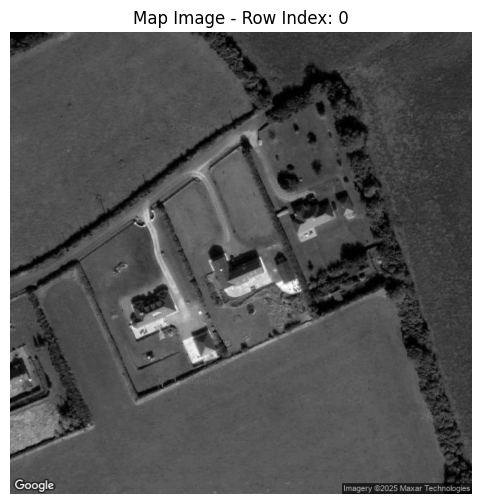

In [36]:
row_index_to_view = 0

# Specify the column containing the pixel arrays
pixel_column = 'map_pixel_array' # Use the actual column name

# --- Code to Display the Image ---

# Check if the DataFrame exists and is not empty
if 'df_with_pixels_test' in locals() and not df_with_pixels_test.empty:
    # Check if the row index is valid
    if row_index_to_view < len(df_with_pixels_test):
        # Get the pixel array from the specified row and column
        try:
            target_array = df_with_pixels_test.loc[row_index_to_view, pixel_column]

            # Check if the extracted data is a valid NumPy array
            if isinstance(target_array, np.ndarray):
                print(f"Displaying image from row index {row_index_to_view}...")

                # Display the array as an image using Matplotlib
                plt.figure(figsize=(6, 6)) # Adjust figure size as needed
                # Use cmap='gray' for grayscale images
                plt.imshow(target_array, cmap='gray', vmin=0, vmax=255)
                plt.title(f"Map Image - Row Index: {row_index_to_view}")
                plt.axis('off') # Hide axes ticks and labels
                plt.show()

            elif target_array is None:
                print(f"Error: No pixel data found for row index {row_index_to_view} (value is None). Fetching might have failed.")
            else:
                print(f"Error: Data in column '{pixel_column}' at row index {row_index_to_view} is not a NumPy array.")
                print(f"Data type found: {type(target_array)}")

        except KeyError:
            print(f"Error: Column '{pixel_column}' not found in the DataFrame.")
        except IndexError:
             print(f"Error: Row index {row_index_to_view} is out of bounds for the DataFrame.")

    else:
        print(f"Error: Row index {row_index_to_view} is out of bounds (DataFrame has {len(df_with_pixels_test)} rows).")
else:
    print("Error: DataFrame 'df_with_pixels_test' not found or is empty.")

In [39]:
# --- Example Usage ---

# 1. Specify the path to the pickle file you want to load
# Make sure this path is correct for your system
pickle_file_to_load = 'TEST_pixels_640x640_z19_satellite.pkl' # <-- CHANGE if needed

# 2. Call the function to load the data
my_dataframe = load_dataframe_from_pickle(pickle_file_to_load)

# 3. Check if loading was successful before using the DataFrame
if my_dataframe is not None:
    print("\n--- DataFrame loaded successfully. You can now work with it. ---")

    # Example: Show the head of non-pixel columns
    pixel_col = 'map_pixel_array' # Adjust if your column name is different
    if pixel_col in my_dataframe.columns:
        display_cols = [col for col in my_dataframe.columns if col != pixel_col]
    else:
        display_cols = my_dataframe.columns.tolist() # Show all if pixel col not found

    print("\nHead of non-pixel columns:")
    print(my_dataframe[display_cols].head())

    # Example: Verify an array (optional)
    if pixel_col in my_dataframe.columns and not my_dataframe.empty:
        first_valid_pixel = my_dataframe[my_dataframe[pixel_col].notna()][pixel_col].iloc[0]
        if isinstance(first_valid_pixel, np.ndarray):
             print(f"\nFirst valid pixel array shape: {first_valid_pixel.shape}")

    # You can now perform any other operations on 'my_dataframe'
    # e.g., my_dataframe.describe(), display specific images, etc.

else:
    print("\n--- DataFrame loading failed. ---")

--- Loading DataFrame from Pickle ---
File path: TEST_pixels_640x640_z19_satellite.pkl

Successfully loaded DataFrame.
Shape: (10, 40)

--- DataFrame loaded successfully. You can now work with it. ---

Head of non-pixel columns:
   OBJECTID     Planning Authority  Application Number  \
0       1.0  Carlow County Council                 161   
1       2.0  Carlow County Council                1610   
2       3.0  Carlow County Council               16100   
3       4.0  Carlow County Council               16101   
4       5.0  Carlow County Council               16102   

                             Development Description  \
0  to construct a two storey split level dwelling...   
1  to construct a 256sqm single storey dwelling w...   
2  the erection of a single storey agricultural s...   
3  the change of use of part of existing office p...   
4     to construct an extension to its premises \r\n   

                                 Development Address  Development Postcode  \
0      

Displaying image from row index 0...


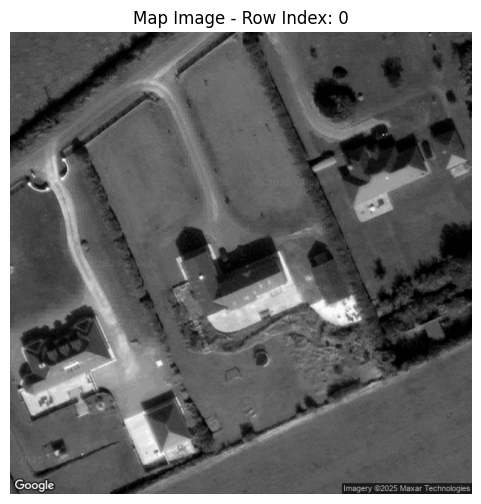

In [41]:
row_index_to_view = 0

# Specify the column containing the pixel arrays
pixel_column = 'map_pixel_array' # Use the actual column name

# --- Code to Display the Image ---

# Check if the DataFrame exists and is not empty
if 'my_dataframe' in locals() and not my_dataframe.empty:
    # Check if the row index is valid
    if row_index_to_view < len(my_dataframe):
        # Get the pixel array from the specified row and column
        try:
            target_array = my_dataframe.loc[row_index_to_view, pixel_column]

            # Check if the extracted data is a valid NumPy array
            if isinstance(target_array, np.ndarray):
                print(f"Displaying image from row index {row_index_to_view}...")

                # Display the array as an image using Matplotlib
                plt.figure(figsize=(6, 6)) # Adjust figure size as needed
                # Use cmap='gray' for grayscale images
                plt.imshow(target_array, cmap='gray', vmin=0, vmax=255)
                plt.title(f"Map Image - Row Index: {row_index_to_view}")
                plt.axis('off') # Hide axes ticks and labels
                plt.show()

            elif target_array is None:
                print(f"Error: No pixel data found for row index {row_index_to_view} (value is None). Fetching might have failed.")
            else:
                print(f"Error: Data in column '{pixel_column}' at row index {row_index_to_view} is not a NumPy array.")
                print(f"Data type found: {type(target_array)}")

        except KeyError:
            print(f"Error: Column '{pixel_column}' not found in the DataFrame.")
        except IndexError:
             print(f"Error: Row index {row_index_to_view} is out of bounds for the DataFrame.")

    else:
        print(f"Error: Row index {row_index_to_view} is out of bounds (DataFrame has {len(df_with_pixels_test)} rows).")
else:
    print("Error: DataFrame 'df_with_pixels_test' not found or is empty.")

## Further Data Cleaning and reduction of data set.

In [ ]:
# Change the Data to be only Kerry county council

In [16]:
# Read the CSV file with low_memory=False
df = pd.read_csv('planning_data_with_gps_corrected.csv', low_memory=False)

# Filter for rows containing 'Kerry County Council' in the Planning Authority column
kerry_df = df[df['Planning Authority'].str.contains('Kerry County Council', case=False, na=False)]

# Remove rows where Decision is missing or blank
kerry_df_clean = kerry_df[kerry_df['Decision'].notna() & (kerry_df['Decision'].str.strip() != '')]

# Remove rows where NumResidentialUnits is exactly 1
kerry_df_units = kerry_df_clean[
    (kerry_df_clean['NumResidentialUnits'].notna()) &
    (kerry_df_clean['NumResidentialUnits'] == 1)
    ]


# Robust filtering for AreaofSite
kerry_df_area = kerry_df_units[
    # Check for non-null values
    (kerry_df_units['AreaofSite'].notna()) &
    # Convert to string and check for non-empty
    (kerry_df_units['AreaofSite'].astype(str).str.strip() != '') &
    # Ensure it's not zero
    (kerry_df_units['AreaofSite'] != 0)
    ]

# Drop the specified columns
kerry_df_final = kerry_df_area.drop(columns=[
    'Applicant Forename',
    'Applicant Surname',
    'Applicant Address',
    'Site Id'
])

# Save the filtered and cleaned DataFrame to a new CSV file
kerry_df_final.to_csv('kerry_county_council_planning_data_final.csv', index=False)

# Print summary information
print(f"Original dataset size: {len(df)} rows")
print(f"Kerry County Council dataset size: {len(kerry_df)} rows")
print(f"Kerry County Council dataset (with valid Decisions) size: {len(kerry_df_clean)} rows")
print(f"Kerry County Council dataset (with valid Decisions and Residential Units) size: {len(kerry_df_units)} rows")
print(
    f"Kerry County Council dataset (with valid Decisions, Residential Units, and Site Area) size: {len(kerry_df_area)} rows")
print(f"Final dataset size after dropping applicant and Site Id columns: {len(kerry_df_final)} rows")


Original dataset size: 483570 rows
Kerry County Council dataset size: 12490 rows
Kerry County Council dataset (with valid Decisions) size: 10579 rows
Kerry County Council dataset (with valid Decisions and Residential Units) size: 7015 rows
Kerry County Council dataset (with valid Decisions, Residential Units, and Site Area) size: 6845 rows
Final dataset size after dropping applicant and Site Id columns: 6845 rows


## Running the Google Maps API on the entire cleaned and reduced dataset.

In [32]:
# 1. Path to corrected data file
input_data_file = 'kerry_county_council_planning_data_final.csv'

# 2. Path to secrets file with api key
secrets_file = 'secrets.yml'

# 3. Define desired API request size and zoom (no separate target size needed)
# Use the largest allowed by the API for max detail, e.g., 640x640
api_image_size = (640, 640)
zoom_level = 19 # High zoom level
map_type_requested = 'satellite'

output_pickle_file = f'planning_data_pixels_{api_image_size[0]}x{api_image_size[1]}_z{zoom_level}_sat.pkl'

api_delay = 0.2

In [33]:
# --- Running the Extraction on the Full Dataset ---

print(f"--- Starting Pixel Extraction for FULL dataset ---")
print(f"Input CSV: {input_data_file}")
print(f"Output Pickle: {output_pickle_file}")
print(f"API Settings: Size={api_image_size}, Zoom={zoom_level}, Type={map_type_requested}")
print(f"\n!!! WARNING !!!")
print(f"This will process the entire dataset and may take a significant amount of time.")
print(f"It will also consume API quota/credits for each row with valid coordinates.")
print(f"Ensure your API key is correctly configured and monitor your usage.")
print(f"Processing starting now...")
print("-" * 30)


# Call the function, passing the FILENAME STRING for the full dataset.
# The function is designed to handle loading the CSV specified by the string.
df_full_with_pixels = add_map_pixel_arrays_direct(
    data=input_data_file,
    input_file_type='csv',
    lat_col='latitude',
    lon_col='longitude',
    secrets_path=secrets_file,
    requested_api_size=api_image_size,
    zoom=zoom_level,
    maptype=map_type_requested,
    output_path=output_pickle_file,
    delay_between_requests=api_delay
)

# --- Check the Result (if successful) ---
print("-" * 30)
if df_full_with_pixels is not None:
    print("\n--- Full Run Result Check ---")
    print(f"Processing completed. Final DataFrame shape: {df_full_with_pixels.shape}")

    # Verify the pixel column exists (should be the default name)
    expected_col_name = DEFAULT_PIXEL_COL_NAME # 'map_pixel_array'

    if expected_col_name in df_full_with_pixels.columns:
        # Calculate how many rows successfully got pixel data
        valid_pixel_count = df_full_with_pixels[expected_col_name].notna().sum()
        total_rows = len(df_full_with_pixels)
        success_rate = (valid_pixel_count / total_rows * 100) if total_rows > 0 else 0
        print(f"Successfully added pixel arrays to {valid_pixel_count} out of {total_rows} rows ({success_rate:.2f}% success rate).")

        # Display info (useful for checking memory usage)
        print("\nDataFrame Info:")
        df_full_with_pixels.info(memory_usage='deep') # 'deep' gives a better memory estimate

    else:
        print(f"\nERROR: Expected pixel column '{expected_col_name}' not found in the final DataFrame.")
        print(f"Columns found: {df_full_with_pixels.columns.tolist()}")

    print(f"\nFull results saved to (or attempted to save to): {output_pickle_file}")

else:
    print("\n--- Full Run Failed (Function returned None) ---")
    print("The process was interrupted or encountered a critical error (e.g., file loading, API key).")
    print("Check the error messages printed above during the run.")

print("\n--- Full Dataset Processing Attempt Finished ---")

--- Starting Pixel Extraction for FULL dataset ---
Input CSV: kerry_county_council_planning_data_final.csv
Output Pickle: planning_data_pixels_640x640_z19_sat.pkl
API Settings: Size=(640, 640), Zoom=19, Type=satellite

!!! WARNING !!!
This will process the entire dataset and may take a significant amount of time.
It will also consume API quota/credits for each row with valid coordinates.
Ensure your API key is correctly configured and monitor your usage.
Processing starting now...
------------------------------
--- Starting Map Image Pixel Extraction (Direct Size) ---
Will store pixel arrays in column: 'map_pixel_array'
API Key loaded successfully.
Loading data from: kerry_county_council_planning_data_final.csv
Loaded 6845 records.
Fetching maps (640x640 pixels, zoom 19, type 'satellite')...


Processing Rows:   0%|          | 0/6845 [00:00<?, ?it/s]


--- Processing Summary ---
Successfully processed map arrays for 6845 rows.
Skipped 0 rows due to missing/invalid coordinates.

Saving updated DataFrame to: planning_data_pixels_640x640_z19_sat.pkl
Successfully saved to planning_data_pixels_640x640_z19_sat.pkl.
--- Map Image Pixel Extraction (Direct Size) Finished ---
------------------------------

--- Full Run Result Check ---
Processing completed. Final DataFrame shape: (6845, 36)
Successfully added pixel arrays to 6845 out of 6845 rows (100.00% success rate).

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845 entries, 0 to 6844
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  6845 non-null   float64
 1   Planning Authority        6845 non-null   object 
 2   Application Number        6845 non-null   int64  
 3   Development Description   6845 non-null   object 
 4   Development Address  

# Load Data from the pickle file

In [3]:
# Reload functionality
def load_dataframe_from_pickle(file_path: str) -> Optional[pd.DataFrame]:
    """
    Loads a pandas DataFrame from a specified Pickle (.pkl) file.

    Args:
        file_path (str): The full path to the .pkl file to load.

    Returns:
        Optional[pd.DataFrame]: The loaded pandas DataFrame if successful,
                                otherwise None if an error occurs (e.g., file not found).
    """
    print(f"--- Loading DataFrame from Pickle ---")
    print(f"File path: {file_path}")

    try:
        # Use pandas read_pickle function
        loaded_df = pd.read_pickle(file_path)

        print(f"\nSuccessfully loaded DataFrame.")
        print(f"Shape: {loaded_df.shape}")
        # Optional: Display basic info automatically upon load
        # print("\n--- DataFrame Info ---")
        # loaded_df.info(verbose=False, memory_usage=False) # Concise info

        return loaded_df

    except FileNotFoundError:
        print(f"\nError: Pickle file not found at '{file_path}'.")
        print("Please ensure the path and filename are correct.")
        return None
    except ImportError as e:
        # Might occur if the pickle file contains custom classes not defined
        # in the current environment. Less likely if saved purely with pandas/numpy.
         print(f"\nError: An import error occurred during unpickling: {e}")
         print("This might happen if the pickle file requires specific libraries or custom classes.")
         return None
    except Exception as e:
        # Catch other potential errors during the unpickling process
        print(f"\nAn unexpected error occurred while loading the Pickle file: {e}")
        import traceback
        traceback.print_exc() # Print detailed traceback for debugging
        return None


In [6]:
# 1. Define the EXACT path to the FULL dataset pickle file you saved
#    This MUST match the 'output_pickle_file_full' used in the previous step.
#    Adjust the filename components (size, zoom, maptype) if they were different.
full_pickle_path = 'planning_data_pixels_640x640_z19_sat.pkl'

# 2. Call the loading function
print(f"\n--- Attempting to load the full dataset from: {full_pickle_path} ---")
df_full_loaded = load_dataframe_from_pickle(full_pickle_path)

# 3. Check if loading was successful and verify the loaded data
if df_full_loaded is not None:
    print("\n--- Full Dataset Loaded Successfully ---")

    # Basic checks
    print(f"Loaded DataFrame shape: {df_full_loaded.shape}")

    # Detailed info including memory usage
    print("\nDataFrame Info:")
    try:
        df_full_loaded.info(memory_usage='deep')
    except Exception as info_err:
        print(f"Could not get detailed info: {info_err}")
        df_full_loaded.info() # Fallback to basic info

    # Check head of non-pixel columns
    pixel_col = 'map_pixel_array' # Make sure this is the correct column name
    if pixel_col in df_full_loaded.columns:
        display_cols = [col for col in df_full_loaded.columns if col != pixel_col]
        print(f"\nHead of non-pixel columns (column '{pixel_col}' excluded):")
        print(df_full_loaded[display_cols].head())

        # Optionally verify an array from the loaded full data
        if not df_full_loaded.empty:
            try:
                # Find first row with a non-null value in the pixel column
                first_valid_row = df_full_loaded[df_full_loaded[pixel_col].notna()].iloc[0]
                first_valid_pixel = first_valid_row[pixel_col]

                if isinstance(first_valid_pixel, np.ndarray):
                    print(f"\nVerified: Pixel data in row index {first_valid_row.name} is a NumPy array with shape {first_valid_pixel.shape}")
                    # You could even display this image again using matplotlib if needed
                else:
                    print(f"\nWarning: Data in '{pixel_col}' (row index {first_valid_row.name}) is type {type(first_valid_pixel)}, not NumPy array.")
            except IndexError:
                 print(f"\nInfo: No non-null values found in the '{pixel_col}' column to verify.")
            except Exception as check_err:
                 print(f"\nError during verification check: {check_err}")

    else:
         print(f"\nWarning: Pixel column '{pixel_col}' not found in loaded DataFrame.")
         print("\nHead of all columns:")
         print(df_full_loaded.head()) # Show head of all columns if pixel one isn't there

    print("\n--- You can now work with the 'df_full_loaded' DataFrame ---")

else:
    print("\n--- Failed to load the full dataset pickle file. ---")
    print("Please check the file path and any error messages printed above.")


--- Attempting to load the full dataset from: planning_data_pixels_640x640_z19_sat.pkl ---
--- Loading DataFrame from Pickle ---
File path: planning_data_pixels_640x640_z19_sat.pkl

Successfully loaded DataFrame.
Shape: (6845, 36)

--- Full Dataset Loaded Successfully ---
Loaded DataFrame shape: (6845, 36)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845 entries, 0 to 6844
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  6845 non-null   float64
 1   Planning Authority        6845 non-null   object 
 2   Application Number        6845 non-null   int64  
 3   Development Description   6845 non-null   object 
 4   Development Address       6845 non-null   object 
 5   Development Postcode      0 non-null      float64
 6   Application Status        6845 non-null   object 
 7   Application Type          6845 non-null   object 
 8   Decision    

In [7]:
# confirming the dataframe again.
df_full_loaded

,OBJECTID,Planning Authority,Application Number,Development Description,Development Address,Development Postcode,Application Status,Application Type,Decision,Land Use Code,...,FIRecDate,Link Application Details,One-Off KPI,ETL_DATE,ORIG_FID,x,y,longitude,latitude,map_pixel_array
0,68058.0,Kerry County Council,16100,RETAIN EXISTING DWELLING AND GARAGE ALL WITHIN...,"KNOCKANUSH EAST , TRALEE , CO KERRY",NaN,APPLICATION FINALISED,RETENTION,CONDITIONAL,GD,...,4/6/2016 12:00:00 AM,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:30 AM,82814.0,-1.085874e+06,6.852997e+06,-9.754573,52.291454,"[[1, 2, 2, 2, 1, 2, 9, 16, 25, 26, 25, 9, 1, 2..."
1,68060.0,Kerry County Council,161001,CHANGE THE USE OF GROUND FLOOR OFFICES TO LIVI...,"2 HILLTOP , BRIDGE ROAD , LISTOWEL",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,LP,...,NaN,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:31 AM,82816.0,-1.055758e+06,6.880764e+06,-9.484039,52.443762,"[[35, 51, 61, 61, 61, 66, 69, 69, 69, 66, 58, ..."
2,68062.0,Kerry County Council,161003,"(A) DEMOLISH EXISTING GARAGE, (B) CONSTRUCT AN...","KILMEANY , KILMORNA , LISTOWEL",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,...,3/16/2017 12:00:00 AM,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:31 AM,82818.0,-1.045259e+06,6.879417e+06,-9.389719,52.436381,"[[90, 80, 73, 60, 56, 38, 38, 12, 22, 20, 20, ..."
3,68063.0,Kerry County Council,161004,CONSTRUCT TWO BUNGALOWS INCORPORATING ATTIC ST...,"DOOLAIG SOUTH , CASTLEISLAND , CO KERRY",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,...,NaN,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:31 AM,82819.0,-1.057717e+06,6.845819e+06,-9.501637,52.251998,"[[51, 55, 65, 60, 65, 69, 72, 74, 77, 80, 80, ..."
4,68064.0,Kerry County Council,161005,FOR THE INSTALLATION OF A COMMUNITY MECHANICAL...,"BALLYNAMAUNAGH , KILCUMMIN , KILLARNEY",NaN,APPLICATION FINALISED,PERMISSION,REFUSED,GD,...,NaN,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:31 AM,82820.0,-1.054935e+06,6.816815e+06,-9.476644,52.092208,"[[66, 66, 63, 63, 61, 70, 75, 72, 68, 63, 66, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840,80341.0,Kerry County Council,2461008,"Demolition of existing outhouse, construction ...","Termons , Waterville , County Kerry",NaN,DECISION MADE,PERMISSION,CONDITIONAL,,...,NaN,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,1/7/2025 3:00:58 PM,95097.0,-1.128553e+06,6.772196e+06,-10.137968,51.845267,"[[97, 97, 97, 97, 84, 84, 84, 82, 76, 84, 92, ..."
6841,80345.0,Kerry County Council,2461015,change the use of an existing dwelling house f...,"No. 2 Bothar Sheen , Glanerought Dromneavane ,...",NaN,DECISION MADE,PERMISSION,CONDITIONAL,,...,NaN,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,1/10/2025 10:50:06 AM,95101.0,-1.067267e+06,6.779707e+06,-9.587423,51.886929,"[[92, 101, 101, 92, 113, 119, 92, 92, 104, 92,..."
6842,80346.0,Kerry County Council,2461017,(a) construction of detached two storey dwelli...,"20 Golf View , Ballygowloge , Listowel",NaN,DECISION MADE,PERMISSION,CONDITIONAL,,...,NaN,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,Yes,1/10/2025 11:59:22 AM,95102.0,-1.054036e+06,6.881188e+06,-9.468569,52.446080,"[[211, 227, 211, 181, 130, 82, 50, 31, 31, 49,..."
6843,80348.0,Kerry County Council,2560002,The development will consist of:\r\nA)\t Demol...,"Gortaglanna , Kilmorna , Listowel",NaN,DECISION MADE,PERMISSION,CONDITIONAL,,...,NaN,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,1/10/2025 12:57:16 PM,95104.0,-1.044619e+06,6.881384e+06,-9.383969,52.447153,"[[106, 103, 100, 84, 62, 62, 75, 95, 113, 119,..."


## Image Display Helper function

In [9]:
def display_map_image(
    df: pd.DataFrame,
    row_index: Any, # Use 'Any' as index can be integer, string, etc.
    pixel_col: str = 'map_pixel_array',
    figsize: Tuple[int, int] = (6, 6),
    title: Optional[str] = None,
    show_axes: bool = False
    ) -> None:
    """
    Displays a map image stored as a NumPy array in a DataFrame cell.

    Args:
        df (pd.DataFrame): The DataFrame containing the pixel data.
        row_index (Any): The index label (e.g., integer position, string label)
                         of the row to display.
        pixel_col (str): The name of the column containing the NumPy pixel arrays.
                         Defaults to 'map_pixel_array'.
        figsize (Tuple[int, int]): The size of the figure for display (width, height).
                                   Defaults to (6, 6).
        title (Optional[str]): Custom title for the plot. If None, a default
                               title including the row index will be used.
                               Defaults to None.
        show_axes (bool): Whether to display the plot axes. Defaults to False.

    Returns:
        None: This function displays a plot but does not return any value.
    """
    print(f"--- Attempting to display image ---")
    print(f"DataFrame Shape: {df.shape}")
    print(f"Target Row Index: {row_index}")
    print(f"Pixel Column: '{pixel_col}'")

    # Basic check on the DataFrame
    if not isinstance(df, pd.DataFrame) or df.empty:
        print("Error: Invalid or empty DataFrame provided.")
        return

    try:
        # --- Access the data using .loc with the provided row index ---
        target_array = df.loc[row_index, pixel_col]

        # --- Check the retrieved data ---
        if isinstance(target_array, np.ndarray):
            print(f"\nDisplaying image from row index {row_index}...")

            # Set default title if none provided
            if title is None:
                plot_title = f"Map Image - Row Index: {row_index}"
            else:
                plot_title = title

            # --- Display using Matplotlib ---
            plt.figure(figsize=figsize)
            # Use cmap='gray' and set intensity range for grayscale
            plt.imshow(target_array, cmap='gray', vmin=0, vmax=255)
            plt.title(plot_title)
            if not show_axes:
                plt.axis('off') # Hide axes by default
            plt.show()

        elif target_array is None:
            print(f"\nError: No pixel data found for row index {row_index} in column '{pixel_col}' (value is None).")
            print("Data might be missing or fetching/processing failed for this row.")
        else:
            print(f"\nError: Data in column '{pixel_col}' at row index {row_index} is not a NumPy array.")
            print(f"Data type found: {type(target_array)}")

    except KeyError:
        # This handles two cases: row_index doesn't exist OR pixel_col doesn't exist
        if row_index not in df.index:
            print(f"\nError: Row index '{row_index}' not found in the DataFrame index.")
        elif pixel_col not in df.columns:
            print(f"\nError: Pixel column '{pixel_col}' not found in the DataFrame columns.")
        else:
            # Should not happen if the above catches work, but as a fallback
            print(f"\nError: Could not access data at index '{row_index}', column '{pixel_col}'.")
    except Exception as e:
        print(f"\nAn unexpected error occurred during display: {e}")
        import traceback
        traceback.print_exc()

--- Attempting to display image ---
DataFrame Shape: (6845, 36)
Target Row Index: 0
Pixel Column: 'map_pixel_array'

Displaying image from row index 0...


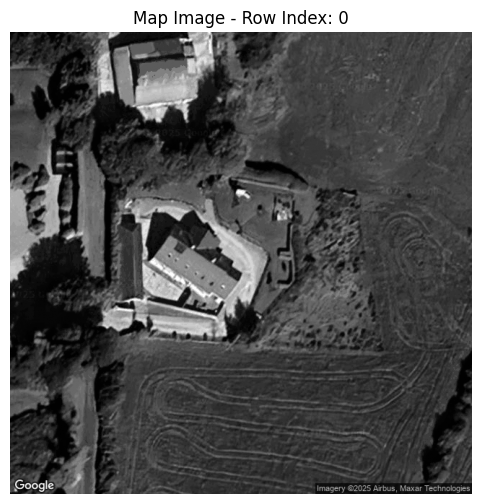

--- Attempting to display image ---
DataFrame Shape: (6845, 36)
Target Row Index: 5
Pixel Column: 'map_pixel_array'

Displaying image from row index 5...


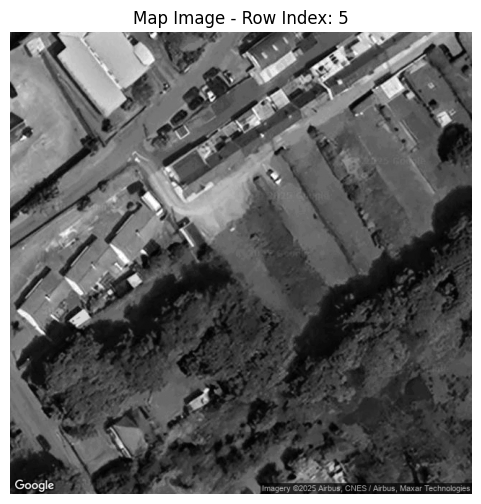

In [37]:
# --- Example Usage ---
index_to_show = 0 # Example: Display the first row (index 0)
display_map_image(df_full_loaded, row_index=index_to_show)
# --- Example: Display another row with a custom title ---
index_to_show_2 = 5
display_map_image(df_full_loaded, row_index=index_to_show_2)

In [ ]:
# Now that the main Data and Images are in place, need to reduce down to less.
# Filtering by year now

In [18]:
def filter_dataframe_by_received_date(
    df: pd.DataFrame,
    date_col: str = 'ReceivedDate',
    cutoff_date_str: str = '2022-01-01',
    # date_format parameter is removed as we are inferring
    keep_datetime_col: bool = False
    ) -> Optional[pd.DataFrame]:
    """
    Filters a DataFrame based on date, attempting to infer mixed date formats.

    Args:
        df (pd.DataFrame): The input DataFrame.
        date_col (str): The name of the column containing date strings.
                        Defaults to 'ReceivedDate'.
        cutoff_date_str (str): The cutoff date as a string (e.g., 'YYYY-MM-DD').
                               Comparison is strictly less than this date.
                               Defaults to '2022-01-01'.
        keep_datetime_col (bool): If True, keeps the temporary column created
                                  for datetime conversion in the output DataFrame.
                                  Defaults to False.

    Returns:
        Optional[pd.DataFrame]: A new DataFrame containing only the filtered rows,
                                or None if a critical error occurs.
    """
    print(f"--- Filtering DataFrame by Date (Inferring Format) ---")
    print(f"Input DataFrame shape: {df.shape}")
    print(f"Filtering based on column: '{date_col}'")
    print(f"Keeping rows where date is before: {cutoff_date_str}")
    print("Attempting to infer date formats automatically...")

    if not isinstance(df, pd.DataFrame) or df.empty:
        print("Error: Input is not a valid or non-empty DataFrame.")
        return None

    if date_col not in df.columns:
        print(f"Error: Date column '{date_col}' not found in the DataFrame.")
        return None

    df_filtered = df.copy()
    temp_dt_col = f'_{date_col}_dt_temp'
    num_original = len(df_filtered)

    # --- Clean the strings first (still important) ---
    print(f"\nCleaning column '{date_col}': Converting to string and stripping whitespace...")
    original_series_cleaned = df_filtered[date_col].fillna('').astype(str).str.strip()

    # --- Attempt conversion WITHOUT specifying format -> Infer ---
    print(f"\nAttempting datetime conversion by inferring format...")
    df_filtered[temp_dt_col] = pd.to_datetime(
        original_series_cleaned, # Use the cleaned series
        errors='coerce'           # Still coerce errors for unparseable strings
        # format=None # No format specified, pandas will infer
    )

    num_converted = df_filtered[temp_dt_col].notna().sum()
    num_failed = num_original - num_converted
    print(f"\nFinal Date Conversion Summary (after inferring):")
    print(f"- Total entries processed: {num_original}")
    print(f"- Successfully converted to datetime: {num_converted}") # Hopefully > 0 now
    if num_failed > 0:
        print(f"- Failed to convert (became NaT or were originally null/empty): {num_failed}")
        if num_converted < num_original and num_failed > 0: # Show failures if not all converted
             failed_cleaned_values = original_series_cleaned[df_filtered[temp_dt_col].isna() & (original_series_cleaned != '')].unique()[:10]
             print(f"- Examples of non-empty cleaned values that failed inference: {failed_cleaned_values}")

    # --- Perform the filtering (only if some dates were converted) ---
    if num_converted == 0:
        print("\nFiltering skipped: No dates were successfully converted even when inferring format.")
        df_filtered = df_filtered.drop(columns=[temp_dt_col], errors='ignore')
        # Don't return None here necessarily, maybe user wants the original df back if no filter applied?
        # Let's return an empty df consistent with filtering logic resulting in 0 rows.
        # Or return the original df? Let's stick to the filtering logic result.
        print(f"Returning an empty DataFrame as no dates could be used for filtering.")
        return df_filtered.drop(columns=[temp_dt_col], errors='ignore').iloc[0:0] # Return empty df with original columns


    try:
        cutoff_datetime = pd.to_datetime(cutoff_date_str)
        mask = df_filtered[temp_dt_col] < cutoff_datetime
        print(f"\nFiltering condition: {temp_dt_col} < {cutoff_datetime.date()}")
    except Exception as e:
        print(f"Error processing cutoff date '{cutoff_date_str}': {e}")
        df_filtered = df_filtered.drop(columns=[temp_dt_col], errors='ignore')
        return None # Error processing cutoff is more critical

    # Apply mask - NaT rows automatically become False here
    df_filtered = df_filtered[mask]
    print(f"\nFiltering complete.")
    print(f"Original row count: {len(df)}")
    print(f"Filtered row count: {len(df_filtered)}")

    # --- Optionally remove the temporary datetime column ---
    if not keep_datetime_col:
        df_filtered = df_filtered.drop(columns=[temp_dt_col], errors='ignore')
        print(f"Removed temporary datetime column: '{temp_dt_col}'")
    else:
        print(f"Kept temporary datetime column: '{temp_dt_col}'")

    print(f"--- Filtering Finished ---")
    return df_filtered

In [21]:
# Filter to results prior to 2020.
df_filtered_pre_2020 = filter_dataframe_by_received_date(
        df=df_full_loaded,
        date_col='ReceivedDate',
        cutoff_date_str='2020-01-01',
        # date_format is no longer an argument here
        keep_datetime_col=False
    )

--- Filtering DataFrame by Date (Inferring Format) ---
Input DataFrame shape: (6845, 36)
Filtering based on column: 'ReceivedDate'
Keeping rows where date is before: 2020-01-01
Attempting to infer date formats automatically...

Cleaning column 'ReceivedDate': Converting to string and stripping whitespace...

Attempting datetime conversion by inferring format...


C:\Users\Adam\AppData\Local\Temp\ipykernel_20088\3401587234.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered[temp_dt_col] = pd.to_datetime(



Final Date Conversion Summary (after inferring):
- Total entries processed: 6845
- Successfully converted to datetime: 6845

Filtering condition: _ReceivedDate_dt_temp < 2020-01-01

Filtering complete.
Original row count: 6845
Filtered row count: 2812
Removed temporary datetime column: '_ReceivedDate_dt_temp'
--- Filtering Finished ---


# Helper functionality for labeling the google images as Built Or Site


In [28]:
pip install ipywidgets

In [29]:
# --- Define ipython_env in the global scope ---
try:
    from IPython.display import display, clear_output
    # If the import succeeds, we are likely in an IPython environment
    ipython_env = True
    print("IPython environment detected. Output clearing enabled.")
except ImportError:
    # If the import fails, assume not in IPython
    ipython_env = False
    print("Warning: IPython environment not detected. Output clearing will not work.")
# --- End global definition ---

IPython environment detected. Output clearing enabled.


In [30]:
# --- Ensure matplotlib displays inline ---
%matplotlib inline

import ipywidgets as widgets
from IPython.display import display, clear_output
import sys # To flush output buffer if needed

In [34]:
def display_map_image_to_widget(
    df: pd.DataFrame, row_index: Any, output_widget: widgets.Output,
    pixel_col: str = 'map_pixel_array', figsize: Tuple[int, int] = (6, 6),
    title: Optional[str] = None, show_axes: bool = False ) -> bool:
    # Simplified version for brevity here:
    try:
        target_array = df.loc[row_index, pixel_col]
        if isinstance(target_array, np.ndarray):
            if title is None: plot_title = f"Map Image - Row Index: {row_index}"
            else: plot_title = title
            with output_widget:
                clear_output(wait=True)
                fig, ax = plt.subplots(figsize=figsize)
                ax.imshow(target_array, cmap='gray', vmin=0, vmax=255)
                ax.set_title(plot_title)
                if not show_axes: ax.axis('off')
                plt.show(fig)
                plt.close(fig)
            return True
        elif target_array is None:
            with output_widget: clear_output(wait=True); print(f"\nInfo: No pixel data for row index {row_index} (None).")
            return False
        else:
            with output_widget: clear_output(wait=True); print(f"\nWarning: Data for row index {row_index} is type {type(target_array)}, not ndarray.")
            return False
    except KeyError:
        with output_widget: clear_output(wait=True); print(f"\nError: Cannot access index '{row_index}' or column '{pixel_col}'.")
        return False
    except Exception as e:
        with output_widget: clear_output(wait=True); print(f"\nError displaying image: {e}")
        return False


# --- Interactive Labeling Function using ipywidgets (with Text Input) ---
def interactive_labeling_widgets_keyboard( # Renamed for clarity
    df: pd.DataFrame,
    pixel_col: str = 'map_pixel_array',
    label_col: str = 'build_status',
    output_path: Optional[str] = None,
    indices_to_label: Optional[List[Any]] = None
    ) -> None:
    """
    Interactively labels images using ipywidgets buttons AND keyboard input
    via a text box (press Enter after typing b/s/k/q).
    Saves the DataFrame when 'Quit & Save' is clicked or loop finishes.
    """
    print("--- Starting Interactive Image Labeling (Widgets + Keyboard) ---")

    # ... (Initial DataFrame and column checks as before) ...
    if not isinstance(df, pd.DataFrame) or df.empty: print("Error: Invalid DataFrame."); return
    if pixel_col not in df.columns: print(f"Error: Pixel column '{pixel_col}' not found."); return

    # Work on a copy
    global df_labeled_kb # Use a distinct global name
    df_labeled_kb = df.copy()

    # ... (Initialize label column as before) ...
    if label_col not in df_labeled_kb.columns: df_labeled_kb[label_col] = pd.Series(dtype='object')
    else: df_labeled_kb[label_col] = df_labeled_kb[label_col].replace('', None)

    # ... (Determine unlabeled_indices as before) ...
    all_indices = df_labeled_kb.index.tolist() if indices_to_label is None else [idx for idx in indices_to_label if idx in df_labeled_kb.index]
    global unlabeled_indices_kb
    unlabeled_indices_kb = [idx for idx in all_indices if pd.isna(df_labeled_kb.at[idx, label_col])]

    if not unlabeled_indices_kb: print("All specified items are already labeled!"); return # Optional: Add saving here too

    print(f"Found {len(unlabeled_indices_kb)} items to label.")
    global current_index_iterator_kb, current_idx_kb
    current_index_iterator_kb = iter(unlabeled_indices_kb)
    current_idx_kb = -1

    # --- Create Widgets ---
    btn_built = widgets.Button(description="Built (B)", button_style='success')
    btn_site = widgets.Button(description="Site (S)", button_style='info')
    btn_skip = widgets.Button(description="Skip (K)", button_style='warning')
    btn_quit = widgets.Button(description="Quit & Save", button_style='danger')
    # --- ADD TEXT INPUT WIDGET ---
    text_input = widgets.Text(
        value='',
        placeholder='Type b/s/k/q then Enter',
        description='Label:',
        disabled=False,
        # continuous_update=False # Ensures event fires on Enter/blur
    )
    # -----------------------------
    output_area = widgets.Output()
    progress_label = widgets.Label(value="Initializing...")
    status_label = widgets.Label(value="")

    # --- Define Action Handler (used by buttons AND text input) ---
    def handle_action(label: Optional[str]):
        global current_idx_kb, df_labeled_kb
        if current_idx_kb != -1:
            if label is not None: # Built or Site
                 df_labeled_kb.at[current_idx_kb, label_col] = label
                 status_label.value = f"Index {current_idx_kb}: Labeled as '{label}'"
            else: # Skip
                 status_label.value = f"Index {current_idx_kb}: Skipped"
            display_next() # Advance to the next image
        else:
             status_label.value="No image loaded yet."

    # --- Define Button Click Handlers (call handle_action) ---
    def on_built_clicked(b): handle_action('built')
    def on_site_clicked(b): handle_action('site')
    def on_skip_clicked(b): handle_action(None)
    def on_quit_clicked(b): # Keep separate as it does more
        global df_labeled_kb
        status_label.value = "Quit requested. Saving..."
        # Disable controls
        btn_built.disabled = True; btn_site.disabled = True
        btn_skip.disabled = True; btn_quit.disabled = True
        text_input.disabled = True
        # Save
        if output_path:
            save_path = output_path
            if not save_path.lower().endswith('.pkl'): save_path += '.pkl'
            try:
                df_labeled_kb.to_pickle(save_path)
                status_label.value = f"Quit & Saved to {save_path}"
                print(f"\nLabeling stopped. Final DataFrame saved to: {save_path}")
            except Exception as e: status_label.value = f"Error saving data: {e}"; print(f"\nError saving DataFrame: {e}")
        else: status_label.value = "Quit. No output path provided for saving."; print("\nLabeling stopped. No output path provided.")

    # --- Define Text Input Handler ---
    def on_text_submit(sender):
        # 'sender' is the Text widget itself
        value = sender.value.lower().strip()
        if value == 'b':
            handle_action('built')
        elif value == 's':
            handle_action('site')
        elif value == 'k':
            handle_action(None) # Skip
        elif value == 'q':
            on_quit_clicked(None) # Quit
        else:
            status_label.value = f"Invalid input: '{value}'. Use b/s/k/q."
        # Clear the text box AFTER processing
        sender.value = ''

    # --- Assign Handlers ---
    btn_built.on_click(on_built_clicked)
    btn_site.on_click(on_site_clicked)
    btn_skip.on_click(on_skip_clicked)
    btn_quit.on_click(on_quit_clicked)
    text_input.on_submit(on_text_submit) # Trigger on Enter key

    # --- Function to Display the Next Image ---
    def display_next():
        global current_idx_kb, unlabeled_indices_kb, current_index_iterator_kb
        try:
            current_idx_kb = next(current_index_iterator_kb)
            total_to_label = len(unlabeled_indices_kb)
            current_pos = unlabeled_indices_kb.index(current_idx_kb) + 1
            progress_label.value = f"Labeling: {current_pos} / {total_to_label} (Index: {current_idx_kb})"
            status_label.value = ""
            # Display image and ensure text input is enabled and focused
            image_displayed = display_map_image_to_widget(df_labeled_kb, current_idx_kb, output_area, pixel_col)
            if image_displayed:
                 text_input.disabled = False
                 # text_input.focus() # Programmatic focus might not work reliably in all browsers/versions
            else: # If image failed (e.g. None), skip to next? Or disable input?
                 text_input.disabled = True # Disable input if no image shown
                 status_label.value += " - Image invalid, skipping input."
                 # Maybe automatically skip?
                 # handle_action(None)
            sys.stdout.flush()
        except StopIteration:
            progress_label.value = "Labeling Complete!"
            status_label.value = "All items processed."
            text_input.disabled = True # Disable text input when done
            output_area.clear_output()
            print("All items processed.")
            on_quit_clicked(None) # Auto-save when done
        except Exception as e:
             progress_label.value = f"Error advancing: {e}"; text_input.disabled = True


    # --- Layout and Initial Display ---
    button_box = widgets.HBox([btn_built, btn_site, btn_skip, btn_quit])
    # Add text input to the layout
    display_box = widgets.VBox([progress_label, output_area, text_input, button_box, status_label])

    display(display_box)
    display_next()

## Manually Labling the sites as built or site via the helper function

In [38]:
# Define the output path for the labeled data
labeled_output_file = 'pre2020_image_labeled_2.pkl'

print(f"\nStarting interactive labeling for DataFrame with shape {df_filtered_pre_2020.shape}")
print("Click buttons below the image to label.")
print(f"Results will be saved to '{labeled_output_file}' when 'Quit & Save' is clicked or all items are done.")


print(f"\nStarting interactive labeling for DataFrame with shape {df_filtered_pre_2020.shape}")
print("Type 'b', 's', 'k', or 'q' into the 'Label:' box and press Enter, OR click the buttons.")
print(f"Results will be saved to '{labeled_output_file}' when 'Quit & Save' is clicked or all items are done.")

# Call the NEW widget-based function
interactive_labeling_widgets_keyboard(
    df=df_filtered_pre_2020,
    pixel_col='map_pixel_array',
    label_col='build_status',
    output_path=labeled_output_file
)


Starting interactive labeling for DataFrame with shape (2812, 36)
Click buttons below the image to label.
Results will be saved to 'pre2020_image_labeled.pkl' when 'Quit & Save' is clicked or all items are done.

Starting interactive labeling for DataFrame with shape (2812, 36)
Type 'b', 's', 'k', or 'q' into the 'Label:' box and press Enter, OR click the buttons.
Results will be saved to 'pre2020_image_labeled.pkl' when 'Quit & Save' is clicked or all items are done.
--- Starting Interactive Image Labeling (Widgets + Keyboard) ---
Found 2812 items to label.


C:\Users\Adam\AppData\Local\Temp\ipykernel_20088\2784064620.py:149: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  text_input.on_submit(on_text_submit) # Trigger on Enter key


# Start of Data Processing, Stages 4,5,6

In [6]:
pip install tensorflow scikit-learn matplotlib


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 2.8 MB/s eta 0:02:15
   ---------------------------------------- 0.8/376.0 MB 1.8 MB/s eta 0:03:33
   ---------------------------------------- 1.0/376.0 MB 1.5 MB/s eta 0:04:06
   ---------------------------------------- 1.0/376.0 MB 1.5 MB/s eta 0:04:06
   ---------------------------------------- 1.3/376.0 MB 1.4 MB/s eta 0:04:34
   ---------------------------------------- 1.6/376.0 MB 1.4 MB/s eta 0:04:37
   ---------------------------------------- 1.8/376.0 MB 1.3 MB/s eta 0:04:43
   ---------------------------------------- 2.1/376.0 MB 1.3 MB/s eta 0:04:47
   ---------------------------------------- 2.4/376.0 MB 1.3 MB/s eta 0:04:50
   ---------------------------------------- 2.6/376.0 MB 1.3 MB/s eta 0:04:50
   ---------------------------------------- 2.9/376.0 MB 1.3 MB/s eta 0:04:52
   ---------------------------------------- 3.1/376.0 MB 1.3 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
pip install --upgrade numpy scipy scikit-learn


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 2.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/12.6 MB 1.5 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/12.6 MB 1.4 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.6 MB 1.4 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/12.6 MB 1.4 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/12.6 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.6 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.6 MB 1.3 MB/s eta 0:00:08
   -------- ------------------------------- 2.6/12.6 MB 1.3 MB/s eta 0:00:08
   -------- ------------------------------- 2.6/12.6 MB 1.3 MB/s eta 0:00:08
   --------- ------------------------------ 2.9/12.6 MB 1.3 MB/s eta 0:00:08
   --------- ------------------------------ 3.1/12.6 MB 1.2 MB/s eta 0:00:08
   --

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import accuracy_score
# Ensure TensorFlow/Keras components are imported correctly
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression

In [42]:
full_pickle_path = 'pre2020_image_labeled.pkl'

# 2. Call the loading function
print(f"\n--- Attempting to load the full dataset from: {full_pickle_path} ---")
df_labeled = load_dataframe_from_pickle(full_pickle_path)


--- Attempting to load the full dataset from: pre2020_image_labeled.pkl ---
--- Loading DataFrame from Pickle ---
File path: pre2020_image_labeled.pkl

Successfully loaded DataFrame.
Shape: (2812, 37)


In [43]:
df_labeled

,OBJECTID,Planning Authority,Application Number,Development Description,Development Address,Development Postcode,Application Status,Application Type,Decision,Land Use Code,...,Link Application Details,One-Off KPI,ETL_DATE,ORIG_FID,x,y,longitude,latitude,map_pixel_array,build_status
0,68058.0,Kerry County Council,16100,RETAIN EXISTING DWELLING AND GARAGE ALL WITHIN...,"KNOCKANUSH EAST , TRALEE , CO KERRY",NaN,APPLICATION FINALISED,RETENTION,CONDITIONAL,GD,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:30 AM,82814.0,-1.085874e+06,6.852997e+06,-9.754573,52.291454,"[[1, 2, 2, 2, 1, 2, 9, 16, 25, 26, 25, 9, 1, 2...",built
1,68060.0,Kerry County Council,161001,CHANGE THE USE OF GROUND FLOOR OFFICES TO LIVI...,"2 HILLTOP , BRIDGE ROAD , LISTOWEL",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,LP,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:31 AM,82816.0,-1.055758e+06,6.880764e+06,-9.484039,52.443762,"[[35, 51, 61, 61, 61, 66, 69, 69, 69, 66, 58, ...",built
2,68062.0,Kerry County Council,161003,"(A) DEMOLISH EXISTING GARAGE, (B) CONSTRUCT AN...","KILMEANY , KILMORNA , LISTOWEL",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:31 AM,82818.0,-1.045259e+06,6.879417e+06,-9.389719,52.436381,"[[90, 80, 73, 60, 56, 38, 38, 12, 22, 20, 20, ...",built
3,68063.0,Kerry County Council,161004,CONSTRUCT TWO BUNGALOWS INCORPORATING ATTIC ST...,"DOOLAIG SOUTH , CASTLEISLAND , CO KERRY",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:31 AM,82819.0,-1.057717e+06,6.845819e+06,-9.501637,52.251998,"[[51, 55, 65, 60, 65, 69, 72, 74, 77, 80, 80, ...",site
4,68064.0,Kerry County Council,161005,FOR THE INSTALLATION OF A COMMUNITY MECHANICAL...,"BALLYNAMAUNAGH , KILCUMMIN , KILLARNEY",NaN,APPLICATION FINALISED,PERMISSION,REFUSED,GD,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,3/10/2022 11:48:31 AM,82820.0,-1.054935e+06,6.816815e+06,-9.476644,52.092208,"[[66, 66, 63, 63, 61, 70, 75, 72, 68, 63, 66, ...",site
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,79285.0,Kerry County Council,19426,CONSTRUCT AN EXTENSION AND TO MAKE ELEVATION C...,"FARRANSPIG AND GORTROE , AGHADOE , KILLARNEY",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,5/26/2022 9:06:12 AM,94041.0,-1.061720e+06,6.813413e+06,-9.537597,52.073425,"[[43, 43, 43, 47, 55, 55, 55, 47, 47, 43, 47, ...",built
6335,79286.0,Kerry County Council,19531,DEMOLISH EXISTING COTTAGE AND CONSTRUCT A NEW ...,"BALLYNAHOW , THE GLEN , BALLINSKELLIGS",NaN,APPLICATION FINALISED,PERMISSION,REFUSED,GD,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,5/26/2022 9:06:12 AM,94042.0,-1.153046e+06,6.773439e+06,-10.357987,51.852164,"[[112, 104, 104, 104, 104, 104, 106, 107, 112,...",site
6336,79287.0,Kerry County Council,19560,RETAIN (A)(1) FIRST FLOOR GABLE WINDOW AND TWO...,"KILCOOLY , BALLYDAVID , DINGLE",NaN,APPLICATION FINALISED,RETENTION,CONDITIONAL,GD,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,No,5/26/2022 9:06:12 AM,94043.0,-1.152069e+06,6.836996e+06,-10.349212,52.203449,"[[59, 69, 69, 70, 74, 74, 74, 73, 70, 70, 78, ...",built
6337,79289.0,Kerry County Council,19771,DEMOLISH EXISTING TWO STOREY DERELICT HOUSE ...,"SACKVILLE , ARDFERT , CO KERRY",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,...,http://www.eplanning.ie/KerryCC/AppFileRefDeta...,Yes,5/26/2022 9:06:12 AM,94045.0,-1.087591e+06,6.861189e+06,-9.769993,52.336445,"[[50, 50, 50, 46, 46, 46, 46, 46, 47, 47, 47, ...",built


In [44]:
df_labeled = df_labeled.drop(columns=['Link Application Details', 'Development Postcode','Application Number'])

In [16]:
df_labeled

,OBJECTID,Planning Authority,Development Description,Development Address,Application Status,Application Type,Decision,Land Use Code,AreaofSite,NumResidentialUnits,...,FIRecDate,One-Off KPI,ETL_DATE,ORIG_FID,x,y,longitude,latitude,map_pixel_array,build_status
0,68058.0,Kerry County Council,RETAIN EXISTING DWELLING AND GARAGE ALL WITHIN...,"KNOCKANUSH EAST , TRALEE , CO KERRY",APPLICATION FINALISED,RETENTION,CONDITIONAL,GD,0.210,1.0,...,4/6/2016 12:00:00 AM,No,3/10/2022 11:48:30 AM,82814.0,-1.085874e+06,6.852997e+06,-9.754573,52.291454,"[[1, 2, 2, 2, 1, 2, 9, 16, 25, 26, 25, 9, 1, 2...",built
1,68060.0,Kerry County Council,CHANGE THE USE OF GROUND FLOOR OFFICES TO LIVI...,"2 HILLTOP , BRIDGE ROAD , LISTOWEL",APPLICATION FINALISED,PERMISSION,CONDITIONAL,LP,0.010,1.0,...,NaN,No,3/10/2022 11:48:31 AM,82816.0,-1.055758e+06,6.880764e+06,-9.484039,52.443762,"[[35, 51, 61, 61, 61, 66, 69, 69, 69, 66, 58, ...",built
2,68062.0,Kerry County Council,"(A) DEMOLISH EXISTING GARAGE, (B) CONSTRUCT AN...","KILMEANY , KILMORNA , LISTOWEL",APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,0.180,1.0,...,3/16/2017 12:00:00 AM,No,3/10/2022 11:48:31 AM,82818.0,-1.045259e+06,6.879417e+06,-9.389719,52.436381,"[[90, 80, 73, 60, 56, 38, 38, 12, 22, 20, 20, ...",built
3,68063.0,Kerry County Council,CONSTRUCT TWO BUNGALOWS INCORPORATING ATTIC ST...,"DOOLAIG SOUTH , CASTLEISLAND , CO KERRY",APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,0.531,1.0,...,NaN,No,3/10/2022 11:48:31 AM,82819.0,-1.057717e+06,6.845819e+06,-9.501637,52.251998,"[[51, 55, 65, 60, 65, 69, 72, 74, 77, 80, 80, ...",site
4,68064.0,Kerry County Council,FOR THE INSTALLATION OF A COMMUNITY MECHANICAL...,"BALLYNAMAUNAGH , KILCUMMIN , KILLARNEY",APPLICATION FINALISED,PERMISSION,REFUSED,GD,4.660,1.0,...,NaN,No,3/10/2022 11:48:31 AM,82820.0,-1.054935e+06,6.816815e+06,-9.476644,52.092208,"[[66, 66, 63, 63, 61, 70, 75, 72, 68, 63, 66, ...",site
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,79285.0,Kerry County Council,CONSTRUCT AN EXTENSION AND TO MAKE ELEVATION C...,"FARRANSPIG AND GORTROE , AGHADOE , KILLARNEY",APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,0.500,1.0,...,NaN,No,5/26/2022 9:06:12 AM,94041.0,-1.061720e+06,6.813413e+06,-9.537597,52.073425,"[[43, 43, 43, 47, 55, 55, 55, 47, 47, 43, 47, ...",built
6335,79286.0,Kerry County Council,DEMOLISH EXISTING COTTAGE AND CONSTRUCT A NEW ...,"BALLYNAHOW , THE GLEN , BALLINSKELLIGS",APPLICATION FINALISED,PERMISSION,REFUSED,GD,1.600,1.0,...,NaN,No,5/26/2022 9:06:12 AM,94042.0,-1.153046e+06,6.773439e+06,-10.357987,51.852164,"[[112, 104, 104, 104, 104, 104, 106, 107, 112,...",site
6336,79287.0,Kerry County Council,RETAIN (A)(1) FIRST FLOOR GABLE WINDOW AND TWO...,"KILCOOLY , BALLYDAVID , DINGLE",APPLICATION FINALISED,RETENTION,CONDITIONAL,GD,0.230,1.0,...,9/5/2019 12:00:00 AM,No,5/26/2022 9:06:12 AM,94043.0,-1.152069e+06,6.836996e+06,-10.349212,52.203449,"[[59, 69, 69, 70, 74, 74, 74, 73, 70, 70, 78, ...",built
6337,79289.0,Kerry County Council,DEMOLISH EXISTING TWO STOREY DERELICT HOUSE ...,"SACKVILLE , ARDFERT , CO KERRY",APPLICATION FINALISED,PERMISSION,CONDITIONAL,GD,0.120,1.0,...,9/25/2019 12:00:00 AM,Yes,5/26/2022 9:06:12 AM,94045.0,-1.087591e+06,6.861189e+06,-9.769993,52.336445,"[[50, 50, 50, 46, 46, 46, 46, 46, 47, 47, 47, ...",built


# Classifiers using the Image data, CNN and PCA.

note, df_labeled must be present before running the following

In [68]:
# --- Configuration ---
IMAGE_COL = 'map_pixel_array'
LABEL_COL = 'build_status'
EXPECTED_SHAPE = (640, 640)
ORIGINAL_SHAPE = (640, 640)
RESIZE_DIMENSIONS = (384, 384)
TEST_SET_SIZE = 0.2
RANDOM_STATE = 42
NUM_CLASSES = 2 # built vs site
# CNN Hyperparameters
CNN_EPOCHS = 10 # Adjusted based on first run epoch taking over 40 minutes, when other programs closed, took 20 minutes per epoch
CNN_BATCH_SIZE = 16 # Adjusted based on memory, 32 batch size tried at first but got a memory error on running.
CNN_LEARNING_RATE = 0.001
# PCA Hyperparameters
PCA_N_COMPONENTS = 0.95 # Retain 95% variance (or set to an integer like 200)
# Incremental attempted since pca otherwise did not ahve enough memory.
PCA_N_COMPONENTS_INC = 100
PCA_BATCH_SIZE = 100

In [46]:
# --- Filter valid rows ---
print("Filtering rows with valid images and labels...")
initial_rows = len(df_labeled)
df_filtered = df_labeled.dropna(subset=[IMAGE_COL, LABEL_COL]).copy()
# Optional: Add check for ndarray type if needed
# df_filtered = df_filtered[df_filtered[IMAGE_COL].apply(lambda x: isinstance(x, np.ndarray))]
rows_after_na = len(df_filtered)
print(f"Removed {initial_rows - rows_after_na} rows. Remaining: {rows_after_na}")


Filtering rows with valid images and labels...
Removed 1 rows. Remaining: 2811


## CNN Model Workflow

In [19]:
# --- Stack images and extract labels ---
print("Extracting and stacking images...")
image_list = []
label_list = []
for idx, row in df_filtered.iterrows():
    img = row[IMAGE_COL]
    if isinstance(img, np.ndarray) and img.shape == EXPECTED_SHAPE:
        image_list.append(img)
        label_list.append(row[LABEL_COL])
    # else: print(f"Warning: Skipping index {idx}...") # Optional warning

if not image_list: print("Error: No valid images found after shape check."); exit()

X_data_2d = np.stack(image_list, axis=0) # Shape: (N, H, W)
y_data_str = np.array(label_list)   # Shape: (N,)
print(f"Data shapes: X_data_2d={X_data_2d.shape}, y_data_str={y_data_str.shape}")

# --- Encode Labels (Common Step) ---
print("Encoding labels...")
label_encoder = LabelEncoder()
y_data_encoded = label_encoder.fit_transform(y_data_str) # Shape: (N,)
y_data_cat = to_categorical(y_data_encoded, num_classes=NUM_CLASSES) # Shape: (N, 2)
print(f"Label Encoding: {label_encoder.classes_} -> {np.unique(y_data_encoded)}")

Extracting and stacking images...
Data shapes: X_data_2d=(2811, 640, 640), y_data_str=(2811,)
Encoding labels...
Label Encoding: ['built' 'site'] -> [0 1]


In [10]:
print("\n" + "="*20 + " CNN Model Workflow " + "="*20)

# --- Preprocess Images for CNN ---
print("Preprocessing images for CNN (Reshape + Normalize)...")
img_height, img_width = X_data_2d.shape[1], X_data_2d.shape[2]
X_data_cnn = np.reshape(X_data_2d, (X_data_2d.shape[0], img_height, img_width, 1)) # Add channel dim
X_data_cnn = X_data_cnn.astype('float32') / 255.0 # Normalize
print(f"CNN input shape: {X_data_cnn.shape}")

# --- Train/Test Split for CNN ---
print("Splitting data for CNN...")
x_train_cnn, x_test_cnn, y_train_cat_cnn, y_test_cat_cnn = train_test_split(
    X_data_cnn, y_data_cat,
    test_size=TEST_SET_SIZE, random_state=RANDOM_STATE, stratify=y_data_cat
)
print(f"CNN Training set: {x_train_cnn.shape}, {y_train_cat_cnn.shape}")
print(f"CNN Testing set:  {x_test_cnn.shape}, {y_test_cat_cnn.shape}")


==================== CNN Model Workflow ====================
Preprocessing images for CNN (Reshape + Normalize)...
CNN input shape: (2811, 640, 640, 1)
Splitting data for CNN...
CNN Training set: (2248, 640, 640, 1), (2248, 2)
CNN Testing set:  (563, 640, 640, 1), (563, 2)


In [11]:
# --- Define CNN Model ---
print("Defining CNN model...")
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPool2D(pool_size=(2, 2)),
    # Conv2D(64, (3, 3), activation='relu'), # Optional second layer
    # MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])
cnn_model.summary()

Defining CNN model...


C:\Users\Adam\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 638, 638, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 319, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3256352)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   416,813,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,813,762 (1.55 GB)

 Trainable params: 416,813,762 (1.55 GB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# --- Compile CNN Model ---
print("Compiling CNN model...")
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=CNN_LEARNING_RATE),
                  metrics=['accuracy'])

# --- Train CNN Model ---
print("Training CNN model...")
history_cnn = cnn_model.fit(x_train_cnn, y_train_cat_cnn,
                            epochs=CNN_EPOCHS,
                            batch_size=CNN_BATCH_SIZE,
                            validation_data=(x_test_cnn, y_test_cat_cnn),
                            verbose=1)

Compiling CNN model...
Training CNN model...
Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1177s 8s/step - accuracy: 0.7350 - loss: 23.0685 - val_accuracy: 0.8259 - val_loss: 0.4073
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 946s 7s/step - accuracy: 0.8346 - loss: 0.4045 - val_accuracy: 0.8615 - val_loss: 0.3788
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 901s 6s/step - accuracy: 0.8814 - loss: 0.2983 - val_accuracy: 0.8384 - val_loss: 0.3773
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1002s 7s/step - accuracy: 0.9262 - loss: 0.2111 - val_accuracy: 0.8277 - val_loss: 0.5176
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 947s 7s/step - accuracy: 0.9370 - loss: 0.1521 - val_accuracy: 0.8757 - val_loss: 0.4129
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 954s 7s/step - accuracy: 0.9464 - loss: 0.1342 - val_accuracy: 0.8668 - val_loss: 0.5333
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 968s 7s/step - accuracy: 0.9675 - loss: 0.1002 - val_accuracy: 0.8526 - val_loss: 0.6686
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2410s 17s

In [13]:
# --- Evaluate CNN Model ---
print("\nEvaluating CNN model...")
loss_cnn, accuracy_cnn = cnn_model.evaluate(x_test_cnn, y_test_cat_cnn, verbose=0)
print(f"CNN Test Loss: {loss_cnn:.4f}")
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

y_pred_prob_cnn = cnn_model.predict(x_test_cnn)
y_pred_indices_cnn = np.argmax(y_pred_prob_cnn, axis=1)
y_test_indices_cnn = np.argmax(y_test_cat_cnn, axis=1)

print("\nCNN Classification Report:")
print(classification_report(y_test_indices_cnn, y_pred_indices_cnn, target_names=label_encoder.classes_))
print("\nCNN Confusion Matrix:")
print(confusion_matrix(y_test_indices_cnn, y_pred_indices_cnn))



Evaluating CNN model...
CNN Test Loss: 0.7012
CNN Test Accuracy: 0.8703
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 800ms/step

CNN Classification Report:
              precision    recall  f1-score   support

       built       0.87      0.98      0.93       465
        site       0.82      0.33      0.47        98

    accuracy                           0.87       563
   macro avg       0.85      0.66      0.70       563
weighted avg       0.86      0.87      0.85       563


CNN Confusion Matrix:
[[458   7]
 [ 66  32]]



Visualizing CNN Training History...


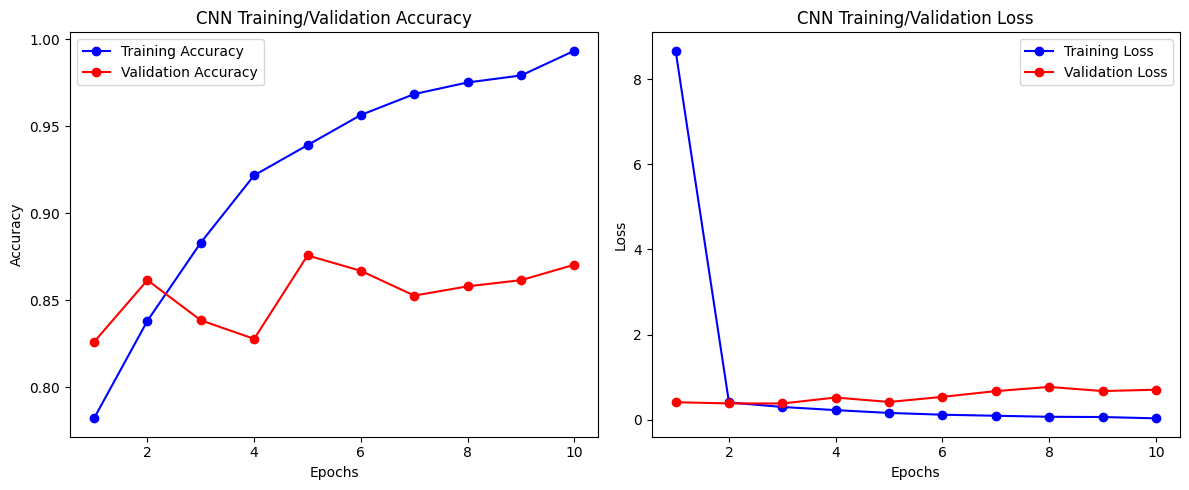

In [14]:
# --- Visualize CNN Training ---
# ... (Plotting code for history_cnn accuracy and loss as in Mnist example from class) ...
print("\nVisualizing CNN Training History...")
history_dict_cnn = history_cnn.history
acc_cnn = history_dict_cnn['accuracy']
val_acc_cnn = history_dict_cnn['val_accuracy']
loss_cnn_hist = history_dict_cnn['loss']
val_loss_cnn = history_dict_cnn['val_loss']
epochs_range_cnn = range(1, len(acc_cnn) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_cnn, acc_cnn, 'bo-', label='Training Accuracy')
plt.plot(epochs_range_cnn, val_acc_cnn, 'ro-', label='Validation Accuracy')
plt.title('CNN Training/Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs_range_cnn, loss_cnn_hist, 'bo-', label='Training Loss')
plt.plot(epochs_range_cnn, val_loss_cnn, 'ro-', label='Validation Loss')
plt.title('CNN Training/Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
plt.tight_layout(); plt.show()

## PCA + Classifier Workflow

### First attempt, didnt work due to memory limitations, next attempts with reduced image size worked.

In [20]:
print("\n" + "="*20 + " PCA + Classifier Workflow " + "="*20)
# WARNING: This part remains computationally expensive!

# --- 3a. Preprocess Images for PCA (Flatten + Normalize) ---
print("Preprocessing images for PCA (Flatten + Normalize)...")
# Flatten the original 2D image data
X_data_flat = np.reshape(X_data_2d, (X_data_2d.shape[0], img_height * img_width))
# Normalize flattened data
X_data_flat = X_data_flat.astype('float32') / 255.0
print(f"PCA input shape (flattened): {X_data_flat.shape}")


==================== PCA + Classifier Workflow ====================
Preprocessing images for PCA (Flatten + Normalize)...
PCA input shape (flattened): (2811, 409600)


In [21]:
# --- Train/Test Split for PCA Data ---
# Use the same split indices for consistency if possible, using the original encoded labels
print("Splitting data for PCA...")
x_train_flat, x_test_flat, y_train_enc_pca, y_test_enc_pca = train_test_split(
    X_data_flat, y_data_encoded, # Use flattened images and numerically encoded labels (0, 1)
    test_size=TEST_SET_SIZE, random_state=RANDOM_STATE, stratify=y_data_encoded
)
print(f"PCA Training set: {x_train_flat.shape}, {y_train_enc_pca.shape}")
print(f"PCA Testing set:  {x_test_flat.shape}, {y_test_enc_pca.shape}")

Splitting data for PCA...
PCA Training set: (2248, 409600), (2248,)
PCA Testing set:  (563, 409600), (563,)


In [24]:
# ---  Apply PCA ---
# IMPORTANT: Fit PCA ONLY on the training data, then transform both train and test
print(f"Applying PCA (n_components={PCA_N_COMPONENTS})...")
pca = PCA(n_components=PCA_N_COMPONENTS)
print("Fitting PCA on training data...")
pca.fit(x_train_flat) # Fit only on training set
print(f"PCA components found: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

print("Transforming training and testing data...")
x_train_pca = pca.transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)
print(f"PCA Transformed Training shape: {x_train_pca.shape}")
print(f"PCA Transformed Testing shape: {x_test_pca.shape}")

Applying PCA (n_components=0.95)...
Fitting PCA on training data...


MemoryError: Unable to allocate 3.43 GiB for an array with shape (2248, 409600) and data type float32

In [29]:
# ---  Apply PCA Incremental ---
# IMPORTANT: Fit PCA ONLY on the training data, then transform both train and test
print(f"Applying IncrementalPCA (batch processing)...")
# Choose a fixed number of components you want to end up with
n_components_pca = 200 # Example: Aim for 200 components
# Choose a batch size that fits comfortably in memory (experiment if needed)
pca_batch_size = 100 # Example: Process 100 samples at a time

# Initialize IncrementalPCA
inc_pca = IncrementalPCA(n_components=n_components_pca, batch_size=pca_batch_size)

print(f"Fitting IncrementalPCA on training data (n_components={n_components_pca}, batch_size={pca_batch_size})...")
# This should process in batches and avoid the large copy error
inc_pca.fit(x_train_flat)
print("IncrementalPCA fitting complete.")

Applying IncrementalPCA (batch processing)...
Fitting IncrementalPCA on training data (n_components=200, batch_size=100)...


MemoryError: Unable to allocate 3.43 GiB for an array with shape (2248, 409600) and data type float32

## Resized images to work, 256 worked, 512 did not, 384 did nto work either, 

In [80]:
# --- Stack images AND RESIZE ---
print(f"Extracting, RESIZING to {RESIZE_DIMENSIONS}, and stacking images...")
image_list_resized = [] # Store resized images
label_list = []
img_height, img_width = RESIZE_DIMENSIONS # <<<--- Use new dimensions

for idx, row in df_filtered.iterrows():
    img = row[IMAGE_COL]
    # Check if it's a valid original array first
    if isinstance(img, np.ndarray) and img.shape == ORIGINAL_SHAPE:
        try:
            # Resize using Pillow
            pil_img = Image.fromarray(img)
            # Use LANCZOS resampling - good quality for downscaling
            img_resized_pil = pil_img.resize(RESIZE_DIMENSIONS, Image.Resampling.LANCZOS)
            img_array_resized = np.array(img_resized_pil) # Convert back to numpy

            # Double check shape after resize (should match)
            if img_array_resized.shape == RESIZE_DIMENSIONS:
                image_list_resized.append(img_array_resized)
                label_list.append(row[LABEL_COL])
            else:
                print(f"Warning: Skipping index {idx} - incorrect shape after resize: {img_array_resized.shape}")
        except Exception as resize_err:
             print(f"Warning: Skipping index {idx} - error during resize: {resize_err}")
    # else: print(f"Warning: Skipping index {idx} due to invalid original image...") # Optional

if not image_list_resized: print("Error: No valid images found after resizing."); exit()

# Stack the RESIZED images
X_data_2d_resized = np.stack(image_list_resized, axis=0) # Shape: (N, H_resized, W_resized)
y_data_str = np.array(label_list)
print(f"Data shapes: X_data_2d_resized={X_data_2d_resized.shape}, y_data_str={y_data_str.shape}") # Verify new shape

Extracting, RESIZING to (384, 384), and stacking images...
Data shapes: X_data_2d_resized=(2811, 384, 384), y_data_str=(2811,)


In [81]:
print("\n" + "="*20 + " PCA + Classifier Workflow (Resized + IncrementalPCA) " + "="*20)

# --- Preprocess Images for PCA (Flatten RESIZED Images + Normalize) ---
print("Preprocessing RESIZED images for PCA (Flatten + Normalize)...")
# Flatten the RESIZED 2D image data
X_data_flat_resized = np.reshape(X_data_2d_resized, (X_data_2d_resized.shape[0], img_height * img_width))
# Normalize flattened data (Can skip if already normalized before CNN, but safe to redo)
X_data_flat_resized = X_data_flat_resized.astype('float32') / 255.0
print(f"PCA input shape (flattened): {X_data_flat_resized.shape}") # <<<--- Verify reduced feature count



==================== PCA + Classifier Workflow (Resized + IncrementalPCA) ====================
Preprocessing RESIZED images for PCA (Flatten + Normalize)...


MemoryError: Unable to allocate 1.54 GiB for an array with shape (2811, 147456) and data type float32

In [71]:
# --- Train/Test Split for PCA Data ---
# Use the RESIZED flattened data
print("Splitting data for PCA...")
x_train_flat_pca, x_test_flat_pca, y_train_enc_pca, y_test_enc_pca = train_test_split(
    X_data_flat_resized, y_data_encoded, # <<<--- Use RESIZED flattened data
    test_size=TEST_SET_SIZE, random_state=RANDOM_STATE, stratify=y_data_encoded
)
print(f"PCA Training set: {x_train_flat_pca.shape}, {y_train_enc_pca.shape}")
print(f"PCA Testing set:  {x_test_flat_pca.shape}, {y_test_enc_pca.shape}")

Splitting data for PCA...
PCA Training set: (2248, 147456), (2248,)
PCA Testing set:  (563, 147456), (563,)


In [75]:
# --- Apply IncrementalPCA ---
print(f"Applying IncrementalPCA (n_components={PCA_N_COMPONENTS_INC}, batch_size={PCA_BATCH_SIZE})...")
inc_pca = IncrementalPCA(n_components=PCA_N_COMPONENTS_INC, batch_size=PCA_BATCH_SIZE)
print("Fitting IncrementalPCA on training data...")
inc_pca.fit(x_train_flat_pca) # <<<--- Fit on RESIZED flattened data
print("IncrementalPCA fitting complete.")
print(f"Components: {inc_pca.n_components_}, Explained Variance: {inc_pca.explained_variance_ratio_.sum():.4f}")

print("Transforming training and testing data...")
try:
    x_train_pca = inc_pca.transform(x_train_flat_pca)
    x_test_pca = inc_pca.transform(x_test_flat_pca)
    print(f"PCA Transformed Training shape: {x_train_pca.shape}")
    print(f"PCA Transformed Testing shape: {x_test_pca.shape}")

    # --- Train Classifier on PCA Features ---
    print("\nTraining Logistic Regression on IncrementalPCA features...")
    pca_classifier = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
    pca_classifier.fit(x_train_pca, y_train_enc_pca)

    # --- Evaluate Classifier ---
    print("\nEvaluating classifier on IncrementalPCA features...")
    y_pred_pca = pca_classifier.predict(x_test_pca)
    accuracy_pca = accuracy_score(y_test_enc_pca, y_pred_pca)
    print(f"IncrementalPCA + Classifier Test Accuracy: {accuracy_pca:.4f}")
    print("\nIncrementalPCA + Classifier Classification Report:")
    print(classification_report(y_test_enc_pca, y_pred_pca, target_names=label_encoder.classes_))
    print("\nIncrementalPCA + Classifier Confusion Matrix:")
    print(confusion_matrix(y_test_enc_pca, y_pred_pca))

except Exception as e:
     print(f"\nError during PCA transform/classification: {e}")

Applying IncrementalPCA (n_components=100, batch_size=100)...
Fitting IncrementalPCA on training data...


MemoryError: Unable to allocate 1.23 GiB for an array with shape (2248, 147456) and data type float32

Extracting and stacking ORIGINAL (640, 640) images...
Data shapes: X_data_2d_original=(2811, 640, 640), y_data_str=(2811,)
Encoding labels...
Label Encoding: ['built' 'site'] -> [0 1]



==================== PCA + Classifier Workflow (Original Size + IncrementalPCA) ====================
!!! WARNING: This will be SLOW and MEMORY INTENSIVE !!!
Preprocessing ORIGINAL images for PCA (Flatten + Normalize)...


MemoryError: Unable to allocate 4.29 GiB for an array with shape (2811, 409600) and data type float32

# Classifiers using the Textual Data